In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


plt.style.use('fivethirtyeight')
%matplotlib inline

# Exploratory data analysis

In [11]:
# Read the crime boston data:
data = pd.read_csv('tmpkrh6apk1.csv')
data.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NaN,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,NaN,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"
2,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NaN,2019-09-29 06:00:00,2019,9,Sunday,6,Part Three,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)"


In [12]:
# Print the data tail:
data.tail(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
426817,I020669075-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426818,I020662996-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:56:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426819,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [13]:
# How many crime reports we have?
data.shape

(426820, 17)

In [14]:
# Data columns:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [15]:
# Data types?
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [16]:
# Data set values:
data.values

array([['I192078648', 3114, 'Investigate Property', ...,
        42.27796370000001, -71.09246318, '(42.27796370, -71.09246318)'],
       ['I192078647', 3115, 'Investigate Person', ..., 42.36769032,
        -71.06586347, '(42.36769032, -71.06586347)'],
       ['I192078645', 3301, 'Verbal Disputes', ..., 42.2918158,
        -71.07244098, '(42.29181580, -71.07244098)'],
       ...,
       ['I020669075-00', 3125, 'Warrant Arrests', ..., 42.36183857,
        -71.05976489, '(42.36183857, -71.05976489)'],
       ['I020662996-00', 3125, 'Warrant Arrests', ..., 42.36183857,
        -71.05976489, '(42.36183857, -71.05976489)'],
       ['I010370257-00', 3125, 'Warrant Arrests', ..., 42.30233307,
        -71.11156487, '(42.30233307, -71.11156487)']], dtype=object)

In [17]:
# Is there any duplicate: ? R= 751
print('Total duplicates:',data['INCIDENT_NUMBER'][data.duplicated()].count())
print('Before remove duplicates:',data['INCIDENT_NUMBER'].count())

# Check them:
data[data.duplicated(keep = 'first')]

# Delete duplicates:
data = data[data.duplicated(keep = 'first')== False]

# The new lenght of the dataframe is:
print("After remove duplicates: ",len(data[data.duplicated(keep = 'first')== False]))

Total duplicates: 751
Before remove duplicates: 426820
After remove duplicates:  426069


In [18]:
# Let's take a look to the basics stats:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,426069.000000,426069.000000,426069.000000,426069.000000,397084.000000,397084.000000
mean,2329.267058,2017.092839,6.645325,13.117950,42.221214,-70.919705
std,1181.006745,1.283404,3.279474,6.295403,2.088739,3.378726
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297111,-71.097189
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077565
75%,3201.000000,2018.000000,9.000000,18.000000,42.348577,-71.062573
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


In [19]:
#Is there any missing value:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2170
REPORTING_AREA              0
SHOOTING               424689
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  106
STREET                  12378
Lat                     28985
Long                    28985
Location                    0
dtype: int64

In [595]:
data[data['SHOOTING'].isnull()].head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NaN,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,NaN,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"
2,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NaN,2019-09-29 06:00:00,2019,9,Sunday,6,Part Three,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)"


In [20]:
# Filling the nans with Nfound :
data['SHOOTING'].fillna('NFound', inplace = True);

In [21]:
#verifying
data['SHOOTING'].isnull().sum()

0

In [22]:
# Handling missing values for the DISTRICT column:
# Lest take a look to the missing values for the column District:

#How manu?
print(data['DISTRICT'].isnull().sum())

data[data['DISTRICT'].isnull()==True].head(5)



2170


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
79,I192078545,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,NaN,,NFound,2019-09-28 20:55:00,2019,9,Saturday,20,Part One,BREMEN,NaN,NaN,"(0.00000000, 0.00000000)"
157,I192078459,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,,NFound,2019-09-28 14:48:25,2019,9,Saturday,14,Part Two,NaN,42.331194,-71.077002,"(42.33119415, -71.07700218)"
251,I192078337,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,NaN,,NFound,2019-09-28 02:55:00,2019,9,Saturday,2,Part Three,NaN,42.325276,-71.059144,"(42.32527562, -71.05914450)"
301,I192078275,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NFound,2019-09-27 22:25:25,2019,9,Friday,22,Part Three,NaN,42.287701,-71.106713,"(42.28770115, -71.10671292)"
369,I192078197,3115,Investigate Person,INVESTIGATE PERSON,NaN,,NFound,2019-07-30 00:00:00,2019,7,Tuesday,0,Part Three,FIRST,NaN,NaN,"(0.00000000, 0.00000000)"


In [23]:
# We can find the district if we have the Lat or Long value, so let's see the cases where we do 
# have that info:

mask = (data['DISTRICT'].isnull()==True) & (data['Lat'].isnull()==False) & (data['Long'].isnull()==False)

print(data[mask].shape)
data[mask].head(5)




(1798, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
157,I192078459,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,,NFound,2019-09-28 14:48:25,2019,9,Saturday,14,Part Two,NaN,42.331194,-71.077002,"(42.33119415, -71.07700218)"
251,I192078337,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,NaN,,NFound,2019-09-28 02:55:00,2019,9,Saturday,2,Part Three,NaN,42.325276,-71.059144,"(42.32527562, -71.05914450)"
301,I192078275,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NFound,2019-09-27 22:25:25,2019,9,Friday,22,Part Three,NaN,42.287701,-71.106713,"(42.28770115, -71.10671292)"
1458,I192076988,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NFound,2019-09-24 08:20:00,2019,9,Tuesday,8,Part Three,NaN,42.274379,-71.109185,"(42.27437902, -71.10918525)"
1534,I192076897,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NFound,2019-09-23 23:08:00,2019,9,Monday,23,Part Three,NaN,42.304144,-71.082324,"(42.30414396, -71.08232421)"


In [24]:
# Lest fill the missing values for the District from similar Lat and Long

missing_district_mask = (data['DISTRICT'].isnull()==True) & (data['Lat'].isnull()==False) & (data['Long'].isnull()==False)&(
                        data['Lat'] > 0.0)&(data['Long'] < -1.0)

all_available_mask = (data['DISTRICT'].isnull() == False) & (data['Lat'].isnull()==False) & (data['Long'].isnull()==False)&(
                       data['Lat'] > 0.0)&(data['Long'] < -1.0) 


all_districts = data[all_available_mask]
all_districts 


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NFound,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,NFound,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"
2,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NFound,2019-09-29 06:00:00,2019,9,Sunday,6,Part Three,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)"
4,I192078640,3115,Investigate Person,INVESTIGATE PERSON,A7,28,NFound,2019-09-29 01:30:00,2019,9,Sunday,1,Part Three,PARIS ST,42.373392,-71.036478,"(42.37339168, -71.03647779)"
5,I192078638,1402,Vandalism,VANDALISM,A1,75,NFound,2019-09-29 04:46:00,2019,9,Sunday,4,Part Two,CAUSEWAY ST,42.364331,-71.063193,"(42.36433126, -71.06319318)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426815,I020691165-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NFound,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426816,I020674147-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NFound,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426817,I020669075-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NFound,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426818,I020662996-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NFound,2019-05-23 08:56:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"


In [25]:
# Make a dic for districts:
district_limits = all_districts.groupby('DISTRICT')['Lat','Long'].aggregate(
    {'min','max'})
district_limits

Lat                  Long           
                max        min        max        min
DISTRICT                                            
A1        42.379026  42.244539 -71.039799 -71.172171
A15       42.394484  42.254185 -71.027537 -71.127871
A7        42.395042  42.272181 -70.995362 -71.169499
B2        42.392146  42.241865 -71.008939 -71.148221
B3        42.373828  42.249738 -71.040525 -71.165336
C11       42.377463  42.252599 -70.963676 -71.166676
C6        42.385841  42.259402 -71.018736 -71.138511
D14       42.372466  42.257066 -71.058814 -71.174692
D4        42.377552  42.241865 -71.052481 -71.164347
E13       42.357826  42.267011 -71.049027 -71.142704
E18       42.372716  42.232413 -71.030484 -71.154297
E5        42.379531  42.252969 -71.038227 -71.178674

In [27]:
# Checking:
district_limits['Lat']['max'][1]

42.39448447

In [611]:
# Impute missing values for district using the district_limits:

for row in data[missing_district_mask].iterrows():
    index, datarow = row
    district = None
    for dist in district_limits.iterrows():
        index2, distrow = dist
        
        if (datarow[14] < distrow['Lat']['max']
            and datarow[14] > distrow['Lat']['min'] 
            and datarow[15] < distrow['Long']['max']
            and datarow[15] > distrow['Long']['min']):
            district = index2
            break
            
 
    data.set_value(index,'DISTRICT',district)
    
    

/home/alannia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [612]:
# Verifying if the number of missing values decresed;
data[data['DISTRICT'].isnull()].head(1)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


In [613]:
# Delete the rest:
data = data[data['DISTRICT'].isnull() == False]

#verifing:
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                 106
STREET                 11069
Lat                    28613
Long                   28613
Location                   0
dtype: int64

In [614]:
# UCR_PART missing values: in this case we can just get rid of the row withour this missing value, since 
# there are only few of them:
data = data[data['UCR_PART'].isnull() == False]
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                 11069
Lat                    28612
Long                   28612
Location                   0
dtype: int64

In [615]:
# Location missing values:
data['Location'][data['Location'] == '(0.00000000, 0.00000000)'].count()

28612

In [616]:
mask = (data['Location'] == '(0.00000000, 0.00000000)') & (data['Lat'].isnull() == False) &  (
    data['Long'].isnull() == False)

data[mask]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


In [617]:
# Since we do not have how to impute the lat or long, we can remove row without them:
data = data[data['Location'] != '(0.00000000, 0.00000000)']

In [618]:
data['STREET'].fillna('Unknow', inplace = True)
data.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [619]:
data.shape

(395181, 17)

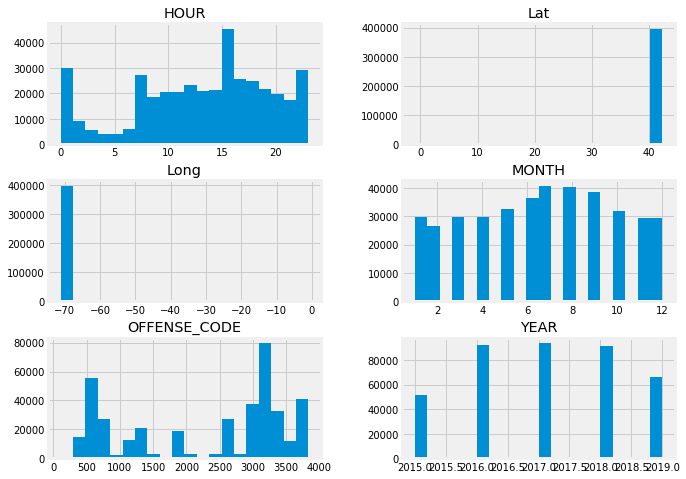

In [620]:
# Plot histograms:
data.hist(figsize = (10,8), bins=20);


In [633]:
# split date into current day and the hour:
new= data["OCCURRED_ON_DATE"].str.split(":", n = 0, expand = True) 

# split date into current day and the hour:
new[['DATE_HOUR','MIN','SEC']] = data["OCCURRED_ON_DATE"].str.split(":", n = 0, expand = True) 

# Incorporate the new colum:
data['DATE_HOUR'] = new['DATE_HOUR']

In [640]:
# Saving the date 
new_DATE = data["OCCURRED_ON_DATE"].str.split(" ", n = 1, expand = True) 
data['DATE'] = new_DATE[0]

In [642]:
data['DATE_HOUR'].head(5)

0    2019-09-29 06
1    2019-09-29 03
2    2019-09-29 06
4    2019-09-29 01
5    2019-09-29 04
Name: DATE_HOUR, dtype: object

## WEATHER DATA

In [670]:
#Reading weather data:
weather_data = pd.read_csv('2011515.csv')
weather_data.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72509014739,2015-01-01T00:54:00,FM-15,7,NaN,NE,2.22,mi,SNOW,32.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-05
1,72509014739,2015-01-01T01:00:00,FM-12,4,NaN,NE,2.22,mi,SNOW,32.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-05
2,72509014739,2015-01-01T01:54:00,FM-15,7,NaN,NE,2.22,mi,SNOW,32.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-05
3,72509014739,2015-01-01T02:54:00,FM-15,7,NaN,NE,2.22,mi,SNOW,32.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-05
4,72509014739,2015-01-01T03:54:00,FM-15,7,NaN,NE,2.22,mi,SNOW,32.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-05


In [671]:
# Data shape:
weather_data.shape

(70758, 124)

In [672]:
# Columns:
weather_data.columns

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupDirection',
       'BackupDistance', 'BackupDistanceUnit', 'BackupElements',
       'BackupElevation',
       ...
       'ShortDurationPrecipitationValue060',
       'ShortDurationPrecipitationValue080',
       'ShortDurationPrecipitationValue100',
       'ShortDurationPrecipitationValue120',
       'ShortDurationPrecipitationValue150',
       'ShortDurationPrecipitationValue180', 'Sunrise', 'Sunset', 'TStorms',
       'WindEquipmentChangeDate'],
      dtype='object', length=124)

In [673]:
# Datatypes:
weather_data.dtypes

STATION                                           int64
DATE                                             object
REPORT_TYPE                                      object
SOURCE                                            int64
AWND                                            float64
BackupDirection                                  object
BackupDistance                                  float64
BackupDistanceUnit                               object
BackupElements                                   object
BackupElevation                                 float64
BackupElevationUnit                             float64
BackupEquipment                                  object
BackupLatitude                                  float64
BackupLongitude                                 float64
BackupName                                       object
CDSD                                            float64
CLDD                                            float64
DSNW                                            

In [674]:
# Basic stats:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
STATION,70758.0,7.250901e+10,0.000000,7.250901e+10,7.250901e+10,7.250901e+10,7.250901e+10,7.250901e+10
SOURCE,70758.0,6.318480e+00,1.199293,4.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
AWND,60.0,1.108833e+01,1.329087,8.700000e+00,1.002500e+01,1.100000e+01,1.210000e+01,1.500000e+01
BackupDistance,70758.0,2.299402e+00,0.154494,2.220000e+00,2.220000e+00,2.220000e+00,2.220000e+00,2.600000e+00
BackupElevation,70758.0,3.012542e+01,5.204002,2.000000e+01,3.280000e+01,3.280000e+01,3.280000e+01,3.280000e+01
BackupElevationUnit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BackupLatitude,70758.0,4.237741e+01,0.013213,4.235170e+01,4.238420e+01,4.238420e+01,4.238420e+01,4.238420e+01
BackupLongitude,70758.0,-7.097618e+01,0.008009,-7.098030e+01,-7.098030e+01,-7.098030e+01,-7.098030e+01,-7.096060e+01
CDSD,60.0,4.515333e+02,438.653196,0.000000e+00,0.000000e+00,3.370000e+02,8.907500e+02,1.106000e+03
CLDD,60.0,8.053333e+01,120.249101,0.000000e+00,0.000000e+00,7.500000e+00,1.225000e+02,4.240000e+02


In [675]:
#Is there any missing value:
weather_data.isnull().sum()

STATION                                             0
DATE                                                0
REPORT_TYPE                                         0
SOURCE                                              0
AWND                                            70698
BackupDirection                                     0
BackupDistance                                      0
BackupDistanceUnit                                  0
BackupElements                                      0
BackupElevation                                     0
BackupElevationUnit                             70758
BackupEquipment                                     0
BackupLatitude                                      0
BackupLongitude                                     0
BackupName                                          0
CDSD                                            70698
CLDD                                            70698
DSNW                                            70698
DailyAverageDewPointTemperat

In [676]:
# Deleting columns with more thant the 80% of values:
weather_data.dropna(thresh=0.8*len(weather_data), axis=1, inplace = True)

#Is there any missing value:
weather_data.isnull().sum()

STATION                          0
DATE                             0
REPORT_TYPE                      0
SOURCE                           0
BackupDirection                  0
BackupDistance                   0
BackupDistanceUnit               0
BackupElements                   0
BackupElevation                  0
BackupEquipment                  0
BackupLatitude                   0
BackupLongitude                  0
BackupName                       0
HourlyDewPointTemperature     1912
HourlyDryBulbTemperature      1907
HourlyRelativeHumidity        1913
HourlySeaLevelPressure       12298
HourlySkyConditions           7240
HourlyStationPressure         2142
HourlyVisibility              1907
HourlyWetBulbTemperature      2149
HourlyWindDirection           2062
HourlyWindSpeed               1924
REM                              1
REPORT_TYPE.1                    0
SOURCE.1                         0
WindEquipmentChangeDate          0
dtype: int64

In [677]:
# Shape:
weather_data.shape

(70758, 27)

In [678]:
# The column HourlySeaLevelPressure  will no be for our interest so we can dissmiss it:
weather_data.drop(columns = 'HourlySeaLevelPressure', inplace = True)

#Is there any missing value:
weather_data.isnull().sum()

STATION                         0
DATE                            0
REPORT_TYPE                     0
SOURCE                          0
BackupDirection                 0
BackupDistance                  0
BackupDistanceUnit              0
BackupElements                  0
BackupElevation                 0
BackupEquipment                 0
BackupLatitude                  0
BackupLongitude                 0
BackupName                      0
HourlyDewPointTemperature    1912
HourlyDryBulbTemperature     1907
HourlyRelativeHumidity       1913
HourlySkyConditions          7240
HourlyStationPressure        2142
HourlyVisibility             1907
HourlyWetBulbTemperature     2149
HourlyWindDirection          2062
HourlyWindSpeed              1924
REM                             1
REPORT_TYPE.1                   0
SOURCE.1                        0
WindEquipmentChangeDate         0
dtype: int64

In [679]:
# Remove rows withour Temperature info:
weather_data = weather_data[weather_data['HourlyDewPointTemperature'].isnull() == False]

#Is there any missing value:
weather_data.isnull().sum()



STATION                         0
DATE                            0
REPORT_TYPE                     0
SOURCE                          0
BackupDirection                 0
BackupDistance                  0
BackupDistanceUnit              0
BackupElements                  0
BackupElevation                 0
BackupEquipment                 0
BackupLatitude                  0
BackupLongitude                 0
BackupName                      0
HourlyDewPointTemperature       0
HourlyDryBulbTemperature        1
HourlyRelativeHumidity          1
HourlySkyConditions          5335
HourlyStationPressure         236
HourlyVisibility                2
HourlyWetBulbTemperature      237
HourlyWindDirection           157
HourlyWindSpeed                19
REM                             0
REPORT_TYPE.1                   0
SOURCE.1                        0
WindEquipmentChangeDate         0
dtype: int64

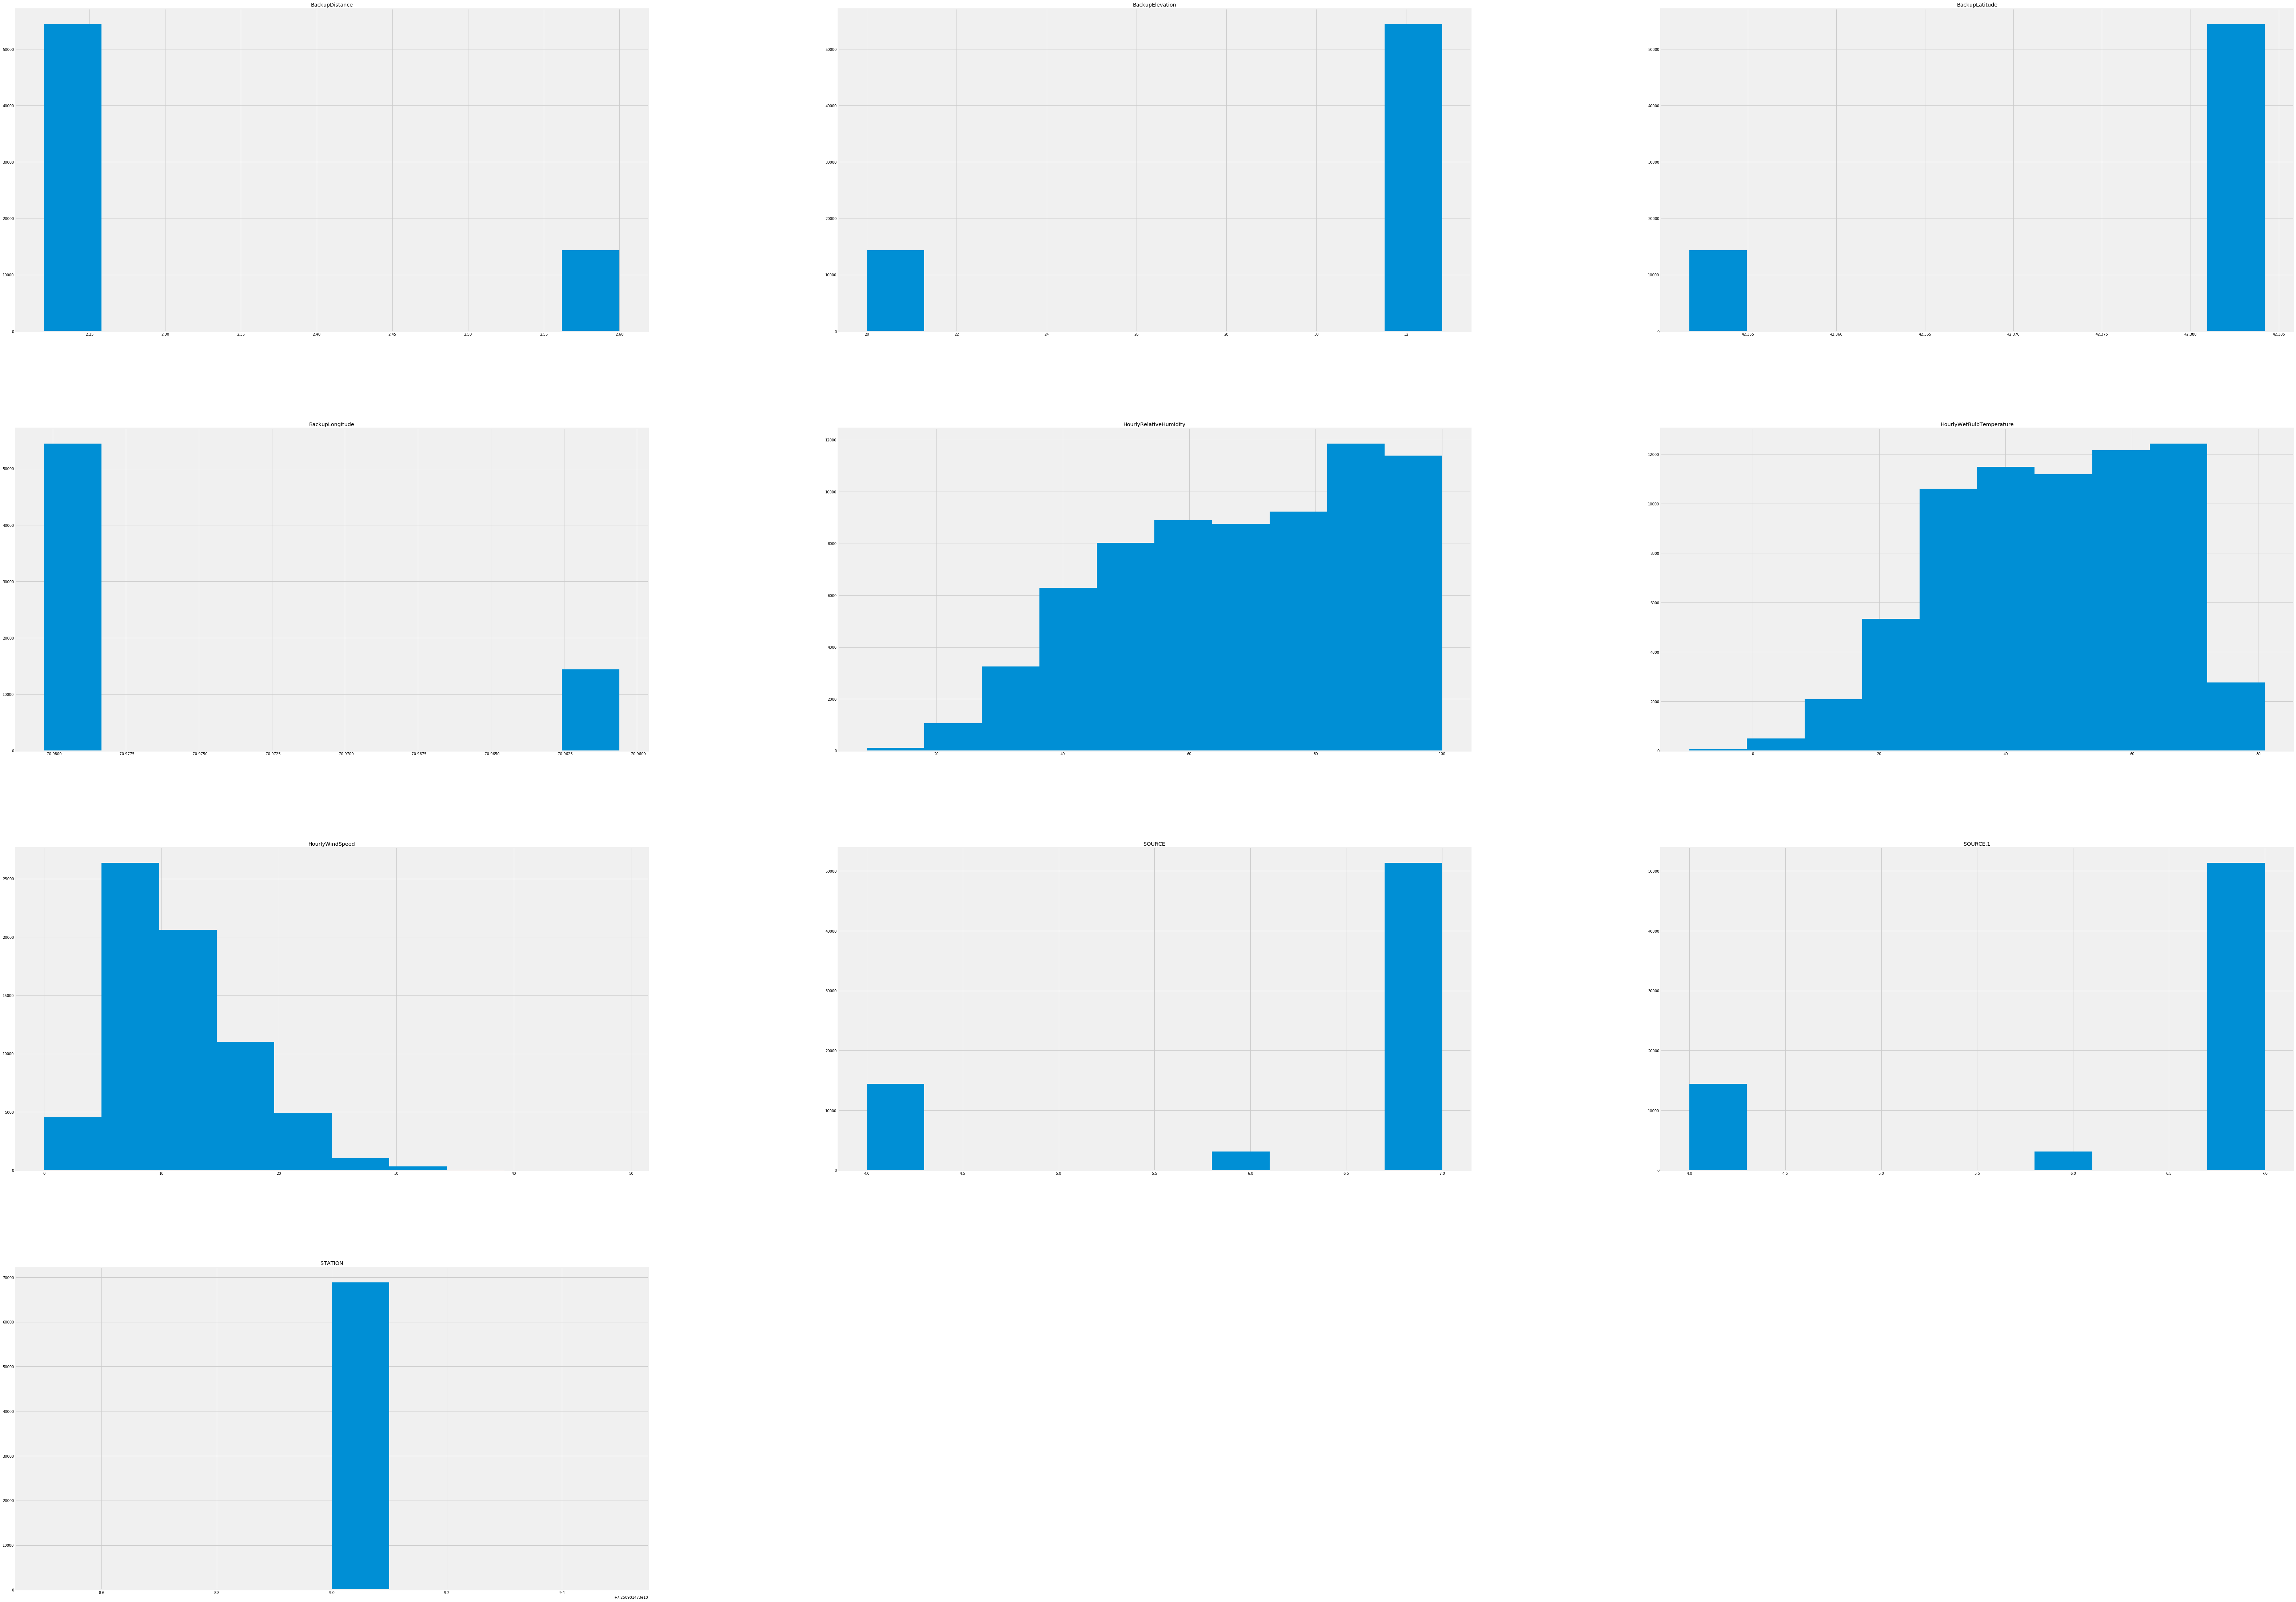

In [682]:
# Histograms :
weather_data.hist(figsize = (100,80));
plt.tick_params(axis='x', rotation=70);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);


In [685]:
# Clean Date format:
weather_data["DATE"].str.split(":", n = 0, expand = True) 

,0,1,2
0,2015-01-01T00,54,00
1,2015-01-01T01,00,00
2,2015-01-01T01,54,00
3,2015-01-01T02,54,00
4,2015-01-01T03,54,00
...,...,...,...
70753,2020-01-20T21,54,00
70754,2020-01-20T22,54,00
70755,2020-01-20T23,54,00
70756,2020-01-21T00,54,00


In [686]:
#split weather data DATE:
new2[['DATE_HOUR','MIN','SEC']] = weather_data["DATE"].str.split(":", n = 0, expand = True) 
new2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,DATE_HOUR,MIN,SEC
0,,2,0,1,5,-,0,1,-,0,1,,2015-01-01T00,54,00
1,,2,0,1,5,-,0,1,-,0,1,,2015-01-01T01,00,00
2,,2,0,1,5,-,0,1,-,0,1,,2015-01-01T01,54,00


In [688]:
# Replace the T with an space:
weather_data['DATE_HOUR'] = new2['DATE_HOUR'].str.replace('T',' ', regex=False)

In [689]:
weather_data.head(3)

,STATION,DATE,REPORT_TYPE,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,...,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate,DATE2,DATE_HOUR
0,72509014739,2015-01-01T00:54:00,FM-15,7,NE,2.22,mi,SNOW,32.8,"SNOWBOARD, SNOW RULER",...,10.00,18.0,220,10.0,MET11901/01/15 00:54:02 METAR KBOS 010554Z 220...,FM-15,7,2006-10-05,2015-01-01,2015-01-01 00
1,72509014739,2015-01-01T01:00:00,FM-12,4,NE,2.22,mi,SNOW,32.8,"SNOWBOARD, SNOW RULER",...,9.94,18.0,220,10.0,SYN08072509 32766 42209 11056 21144 30185 4019...,FM-12,4,2006-10-05,2015-01-01,2015-01-01 01
2,72509014739,2015-01-01T01:54:00,FM-15,7,NE,2.22,mi,SNOW,32.8,"SNOWBOARD, SNOW RULER",...,10.00,18.0,230,10.0,MET10801/01/15 01:54:02 METAR KBOS 010654Z 230...,FM-15,7,2006-10-05,2015-01-01,2015-01-01 01


In [2]:
# Imputing specific missing values:
weather_data.set_value(3754,'HourlyWetBulbTemperature',46.0)
weather_data.set_value(3754,'HourlyWindSpeed',7.0)
weather_data.loc[3754].HourlyWetBulbTemperature

In [4]:
weather_data.set_value(3755,'HourlyWindDirection',360);

weather_data.set_value(3755,'HourlyWindSpeed',7.0);

In [479]:
weather_data[weather_data['DATE_HOUR'].isnull()]

,STATION,DATE,REPORT_TYPE,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,...,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate,DATE_HOUR


In [697]:
# Sky conditions missing values:
pd.set_option('display.max_columns', 27)
weather_data[weather_data['HourlySkyConditions'].isnull()]

weather_data.loc[4:5]

,STATION,DATE,REPORT_TYPE,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate,DATE2,DATE_HOUR
4,72509014739,2015-01-01T03:54:00,FM-15,7,NE,2.22,mi,SNOW,32.8,"SNOWBOARD, SNOW RULER",42.3842,-70.9803,"KENNEDY RD, WINTHROP",...,46.0,SCT:04 130 BKN:07 170,30.01,10.00,19.0,240,13.0,MET11401/01/15 03:54:02 METAR KBOS 010854Z 240...,FM-15,7,2006-10-05,2015-01-01,2015-01-01 03
5,72509014739,2015-01-01T04:00:00,FM-12,4,NE,2.22,mi,SNOW,32.8,"SNOWBOARD, SNOW RULER",42.3842,-70.9803,"KENNEDY RD, WINTHROP",...,46.0,NaN,30.02,9.94,19.0,240,13.0,SYN06472509 32966 62411 11044 21144 30165 4017...,FM-12,4,2006-10-05,2015-01-01,2015-01-01 04


In [540]:
unavailable_sky_cond = weather_data[weather_data['HourlySkyConditions'].isnull()]

available_sky_cond = weather_data[weather_data['HourlySkyConditions'].isnull() ==False]

#available_sky_cond.loc[2]


In [542]:
# Imputing sky cond for missing values:

for row in unavailable_sky_cond.iterrows():
    index, datarow = row
    condition = None
    for row2 in available_sky_cond.iterrows():
        index2, datarow2 = row2
        
        if datarow[26] == datarow2[26]:
            condition = datarow2[16]
            break
      #  if weather_data.loc[index-1]['HourlySkyConditions'] in available_sky_cond :
      #      condition =  weather_data.loc[index-1]['HourlySkyConditions']
      #      break           
    
   # print(weather_data.loc[index]['HourlySkyConditions'],condition)  
   # weather_data.loc[index].iat('HourlySkyConditions',condition)

None None
None None
None None
None None
None None
None None
None None
None None
None None
None None


KeyboardInterrupt: 

In [563]:
# Exporting the weather data set just in case:
weather_data.to_csv(r'/home/alannia/Downloads/weather_data3.csv', index = False )


In [550]:
unavailable_visibility = weather_data[weather_data['HourlyVisibility'].isnull()]
available_visibility = weather_data[weather_data['HourlyVisibility'].isnull() ==False]

unavailable_visibility.head(3)


,STATION,DATE,REPORT_TYPE,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate,DATE_HOUR


In [549]:
# Imputing missing values for visibility column:
for row in unavailable_visibility.iterrows():
    index, datarow = row
    condition = None
    for row2 in available_visibility.iterrows():
        index2, datarow2 = row2
        
        if datarow[26] == datarow2[26]:
            condition = datarow2[18]
            break
            
        if weather_data.loc[index-1]['HourlyVisibility'] in available_sky_cond :
            condition =  weather_data.loc[index-1]['HourlyVisibility']
            break     
    print(index)   
    weather_data.set_value(index,'HourlyVisibility',condition)

35647


/home/alannia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


46789


In [553]:
unavailable_SPressure = weather_data[weather_data['HourlyStationPressure'].isnull()]
available_SPressure = weather_data[weather_data['HourlyStationPressure'].isnull() ==False]

unavailable_visibility.head(3)


# Imputing missing values:
for row in unavailable_SPressure.iterrows():
    index, datarow = row
    condition = None
    for row2 in available_SPressure.iterrows():
        index2, datarow2 = row2
        
        if datarow[26] == datarow2[26]:
            condition = datarow2[17]
            break
            
        if weather_data.loc[index-1]['HourlyStationPressure'] in available_sky_cond :
            condition =  weather_data.loc[index-1]['HourlyStationPressure']
            break     
    print(index,condition)   
    weather_data.set_value(index,'HourlyStationPressure',condition)

2392 None


/home/alannia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


12566 30.34
14311 None
14312 None
18765 29.85
20219 30.05
30527 28.87
30528 None
30529 None
31247 29.94
31248 None
31249 None
31251 29.97
31253 29.99
31283 29.97
31284 None
31285 None
31287 30.00
35643 29.92
35644 None
35647 29.91
37275 None
37278 29.85
37298 29.71
39931 30.42
41480 30.09
50284 29.74
55390 29.80
56866 None
56867 None
56868 None
58222 30.07
58521 None
63854 29.91
63949 30.23
63950 None
63951 None
63953 30.26
63954 None
63982 30.15
63983 None
63984 None
63986 30.16
64015 29.93
64016 None
64017 None
64019 29.96
64020 None
64149 None
64151 30.03
64943 29.85
65318 None
67016 29.43
67017 None
67018 None
67020 29.49
67021 None
67022 None
67024 29.60
67025 None
67026 None
67028 None
67029 None
67031 29.69
67032 None
67033 None
67035 29.75
67036 None
67037 None
67039 29.83
67040 None
67041 None
67043 29.89
67044 None
67072 30.01
67073 None
67074 None
67076 30.02
67077 None
67190 29.94
67241 30.07


KeyError: 67243

In [ ]:
#HourlyWetBulbTemperature
unavailable_WetBulbTemp = weather_data[weather_data['HourlyWetBulbTemperature'].isnull()]
available_WetBulbTemp = weather_data[weather_data['HourlyWetBulbTemperature'].isnull() ==False]

unavailable_visibility.head(3)


# Imputing missing values:
for row in unavailable_WetBulbTemp.iterrows():
    index, datarow = row
    condition = None
    for row2 in available_WetBulbTemp.iterrows():
        index2, datarow2 = row2
        
        if datarow[26] == datarow2[26]:
            condition = datarow2[19]
            break
            
        if weather_data.loc[index-1]['HourlyWetBulbTemperature'] in available_sky_cond :
            condition =  weather_data.loc[index-1]['HourlyWetBulbTemperature']
            break     
    #print(index,condition)   
    weather_data.set_value(index,'HourlyWetBulbTemperature',condition)

In [698]:
# READ and IMPORT the clean weather data from a previuos data frame (to avoid run all for
# loops everytime I restar the kernel)

wd = pd.read_csv('/home/alannia/Downloads/weather_data3.csv')
wd.sort_values("DATE", inplace = True) 

# Clean duplicates:
wd_NDUPLICATES = wd.drop_duplicates('DATE_HOUR')

wd_NDUPLICATES.shape


(44301, 27)

# Merge data frames

In [5]:
# Marge dataframes:
df = pd.merge(data, wd_NDUPLICATES, on='DATE_HOUR', how='left')
dataframe1 = pd.merge(data, wd_NDUPLICATES, on='DATE_HOUR', how='right')

In [48]:
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate
0,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NFound,2019-09-29 06:39:00,2019,9,...,FEW:02 40,30.16,10.00,62.0,320,13.0,MET11909/29/19 06:54:02 METAR KBOS 291154Z 320...,FM-15,7.0,2006-10-05
1,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,NFound,2019-09-29 03:45:00,2019,9,...,FEW:02 40,30.05,10.00,66.0,300,8.0,MET10409/29/19 03:54:02 METAR KBOS 290854Z 300...,FM-15,7.0,2006-10-05
2,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NFound,2019-09-29 06:00:00,2019,9,...,FEW:02 40,30.16,10.00,62.0,320,13.0,MET11909/29/19 06:54:02 METAR KBOS 291154Z 320...,FM-15,7.0,2006-10-05


In [49]:
df.shape 

(396277, 44)

In [55]:
# Lest check again if we have duplicates:
df[df.duplicated()==True]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate


In [62]:
df[df.INCIDENT_NUMBER == 'I192078638']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate
4,I192078638,1402,Vandalism,VANDALISM,A1,75,NFound,2019-09-29 04:46:00,2019,9,...,41,30.06,9.94,66.0,300,8.0,SYN06472509 32666 23007 10211 20178 30179 4018...,FM-12,4.0,2006-10-05
5,I192078638,801,Simple Assault,ASSAULT - SIMPLE,A1,75,NFound,2019-09-29 04:46:00,2019,9,...,41,30.06,9.94,66.0,300,8.0,SYN06472509 32666 23007 10211 20178 30179 4018...,FM-12,4.0,2006-10-05


In [57]:
df[df['INCIDENT_NUMBER']== 'I192078640']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate
3,I192078640,3115,Investigate Person,INVESTIGATE PERSON,A7,28,NFound,2019-09-29 01:30:00,2019,9,...,NaN,30.02,9.94,67.0,230,9.0,SYN08072509 32966 82308 10217 20178 30165 4017...,FM-12,4.0,2006-10-05


In [63]:
df.isnull().sum()

INCIDENT_NUMBER                  0
OFFENSE_CODE                     0
OFFENSE_CODE_GROUP               0
OFFENSE_DESCRIPTION              0
DISTRICT                         0
REPORTING_AREA                   0
SHOOTING                         0
OCCURRED_ON_DATE                 0
YEAR                             0
MONTH                            0
DAY_OF_WEEK                      0
HOUR                             0
UCR_PART                         0
STREET                           0
Lat                              0
Long                             0
Location                         0
DATE_HOUR                        0
STATION                         17
DATE                            17
REPORT_TYPE                     17
SOURCE                          17
BackupDirection                 17
BackupDistance                  17
BackupDistanceUnit              17
BackupElements                  17
BackupElevation                 17
BackupEquipment                 17
BackupLatitude      

In [101]:
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,REPORT_TYPE.1,SOURCE.1,WindEquipmentChangeDate
0,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,NFound,2019-09-29 06:39:00,2019,9,...,FEW:02 40,30.16,10.00,62.0,320,13.0,MET11909/29/19 06:54:02 METAR KBOS 291154Z 320...,FM-15,7.0,2006-10-05
1,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,NFound,2019-09-29 03:45:00,2019,9,...,FEW:02 40,30.05,10.00,66.0,300,8.0,MET10409/29/19 03:54:02 METAR KBOS 290854Z 300...,FM-15,7.0,2006-10-05
2,I192078645,3301,Verbal Disputes,VERBAL DISPUTE,B3,450,NFound,2019-09-29 06:00:00,2019,9,...,FEW:02 40,30.16,10.00,62.0,320,13.0,MET11909/29/19 06:54:02 METAR KBOS 291154Z 320...,FM-15,7.0,2006-10-05
3,I192078640,3115,Investigate Person,INVESTIGATE PERSON,A7,28,NFound,2019-09-29 01:30:00,2019,9,...,NaN,30.02,9.94,67.0,230,9.0,SYN08072509 32966 82308 10217 20178 30165 4017...,FM-12,4.0,2006-10-05
4,I192078638,1402,Vandalism,VANDALISM,A1,75,NFound,2019-09-29 04:46:00,2019,9,...,41,30.06,9.94,66.0,300,8.0,SYN06472509 32666 23007 10211 20178 30179 4018...,FM-12,4.0,2006-10-05


In [131]:
# Drop the rest of nans:
df2 = df.dropna()
df2.shape
df2.drop(columns = ['YEAR'], inplace = True)
df2.drop(columns = ['Location'], inplace = True)


# In case you have to restart the kernel: the df2 is here:
df2.to_csv(r'/home/alannia/Downloads/Bostoncrime_df2.csv', index = False )


/home/alannia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'DATE_HOUR', 'STATION', 'DATE', 'REPORT_TYPE',
       'SOURCE', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit',
       'BackupElements', 'BackupElevation', 'BackupEquipment',
       'BackupLatitude', 'BackupLongitude', 'BackupName',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 'HourlySkyConditions',
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindDirection', 'HourlyWindSpeed', 'REM', 'REPORT_TYPE.1',
       'SOURCE.1', 'WindEquipmentChangeDate'],
      dtype='object')

## Reading df2 from computing

In [35]:
# In case you have to restart the kernel: the df2 is here:
df2 = pd.read_csv(r'/home/alannia/Downloads/Bostoncrime_df2.csv')

# Cleanning the -3s for -3
df2['HourlyDewPointTemperature'].replace({'-3s': -3}, inplace = True)
#df2[df2['HourlyDewPointTemperature'] == '-3s']

#Cleanning the 78s
df2['HourlyDryBulbTemperature'].replace({'78s': '78'}, inplace = True)
#df2[df2['HourlyDryBulbTemperature'] == '78s']

#Cleanning the HourlyStationPressure:
df2['HourlyStationPressure'] = df2.HourlyStationPressure.astype(np.str)
df2.HourlyStationPressure = df2.HourlyStationPressure.apply(lambda x: x.replace('s', ''))
#df2[df2['HourlyStationPressure'].str.contains('s')]


#Cleanning the HourlyWindDirecction
'''VRB: Less than 6 km/h or variation more than 180°.
    In the U.S., the criterion for a variable wind is: 
    wind speed greater than 6 kt and direction varies
    by 60 degrees or more. If the wind is >1 kt but <6 kt,
    the wind direction may be replaced by ”VRB” followed by
    the speed or reported as 
    
    For this cases I change "VRB" for the number -> 444'''
#df2['HourlyWindDirection'].unique()
df2.HourlyWindDirection.replace({'VRB': '444'}, inplace = True)

#Cleanning the HourlyVisibility:
df2['HourlyVisibility'] = df2.HourlyVisibility.astype(np.str)
df2['HourlyVisibility'] = df2.HourlyVisibility.apply(lambda x: x.replace('V', ''))


# Change str to float for the horulytemp column:
df2['HourlyDewPointTemperature'] = df2.HourlyDewPointTemperature.astype(np.float)
df2['HourlyDryBulbTemperature'] = df2.HourlyDryBulbTemperature.astype(np.float)
df2['HourlyStationPressure'] = df2.HourlyStationPressure.astype(np.float)
df2['HourlyVisibility'] = df2.HourlyVisibility.astype(np.float)
df2['HourlyWindDirection'] = df2.HourlyWindDirection.astype(np.float)

df2.dtypes



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0                     int64
INCIDENT_NUMBER               object
OFFENSE_CODE                   int64
OFFENSE_CODE_GROUP            object
OFFENSE_DESCRIPTION           object
DISTRICT                      object
REPORTING_AREA                object
SHOOTING                      object
OCCURRED_ON_DATE              object
YEAR                           int64
MONTH                          int64
DAY_OF_WEEK                   object
HOUR                           int64
UCR_PART                      object
STREET                        object
Lat                          float64
Long                         float64
Location                      object
DATE_HOUR                     object
STATION                      float64
DATE                          object
REPORT_TYPE                   object
SOURCE                       float64
BackupDirection               object
BackupDistance               float64
BackupDistanceUnit            object
BackupElements                object
B

In [36]:

#Basic stats:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,363536.0,1.935609e+05,108849.148240,0.000000e+00,9.957875e+04,1.962255e+05,2.875302e+05,3.787650e+05
OFFENSE_CODE,363536.0,2.313265e+03,1177.684119,1.110000e+02,1.001000e+03,3.001000e+03,3.201000e+03,3.831000e+03
YEAR,363536.0,2.017125e+03,1.226328,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03
MONTH,363536.0,6.657272e+00,3.366479,1.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
HOUR,363536.0,1.312934e+01,6.232493,0.000000e+00,9.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01
Lat,363536.0,4.229899e+01,1.001020,-1.000000e+00,4.229733e+01,4.232557e+01,4.234861e+01,4.239504e+01
Long,363536.0,-7.104562e+01,1.618817,-7.117867e+01,-7.109744e+01,-7.107767e+01,-7.106259e+01,-1.000000e+00
STATION,363536.0,7.250901e+10,0.000000,7.250901e+10,7.250901e+10,7.250901e+10,7.250901e+10,7.250901e+10
SOURCE,363536.0,6.097751e+00,1.355910,4.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
BackupDistance,363536.0,2.283036e+00,0.141351,2.220000e+00,2.220000e+00,2.220000e+00,2.220000e+00,2.600000e+00


# Data visualization:

Text(0.5, 1.0, 'Day of Week vs Crime rate')

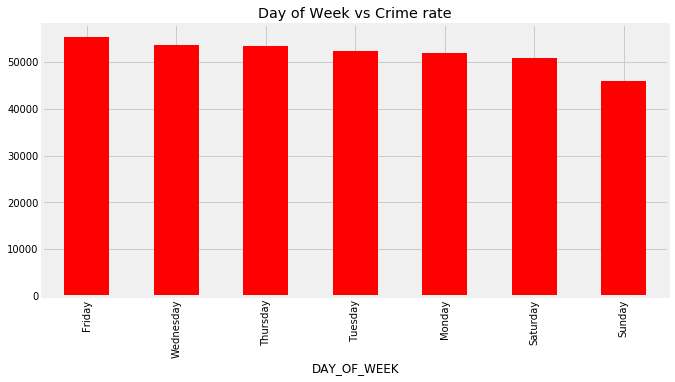

In [37]:
# Data visualization:

plt.figure(figsize=(10,5))
df2.groupby('DAY_OF_WEEK').agg('count').INCIDENT_NUMBER.sort_values(ascending = False
                                                                   ).plot(kind = 'bar',
                                                                         color = 'red');
plt.title('Day of Week vs Crime rate')

In [38]:
# Clean format on df2.DATE:
new2_DATE = df2["DATE"].str.split("T", n = 0, expand = True) 
df2['DATE_ONLY']=new2_DATE[0]

Text(0.5, 0, 'Day of week')

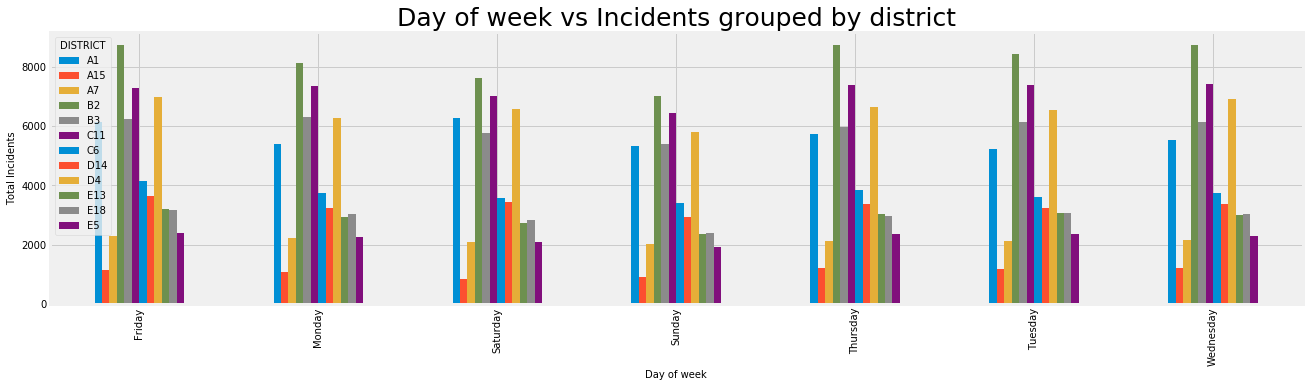

In [39]:
df2.groupby(['DAY_OF_WEEK','DISTRICT']).size().unstack(fill_value=0).plot.bar(figsize=(20,5));
                                                                       
plt.ylabel('Total Incidents', size = (10))
plt.title('Day of week vs Incidents grouped by district', size = (25))
plt.xlabel('Day of week', size = (10))

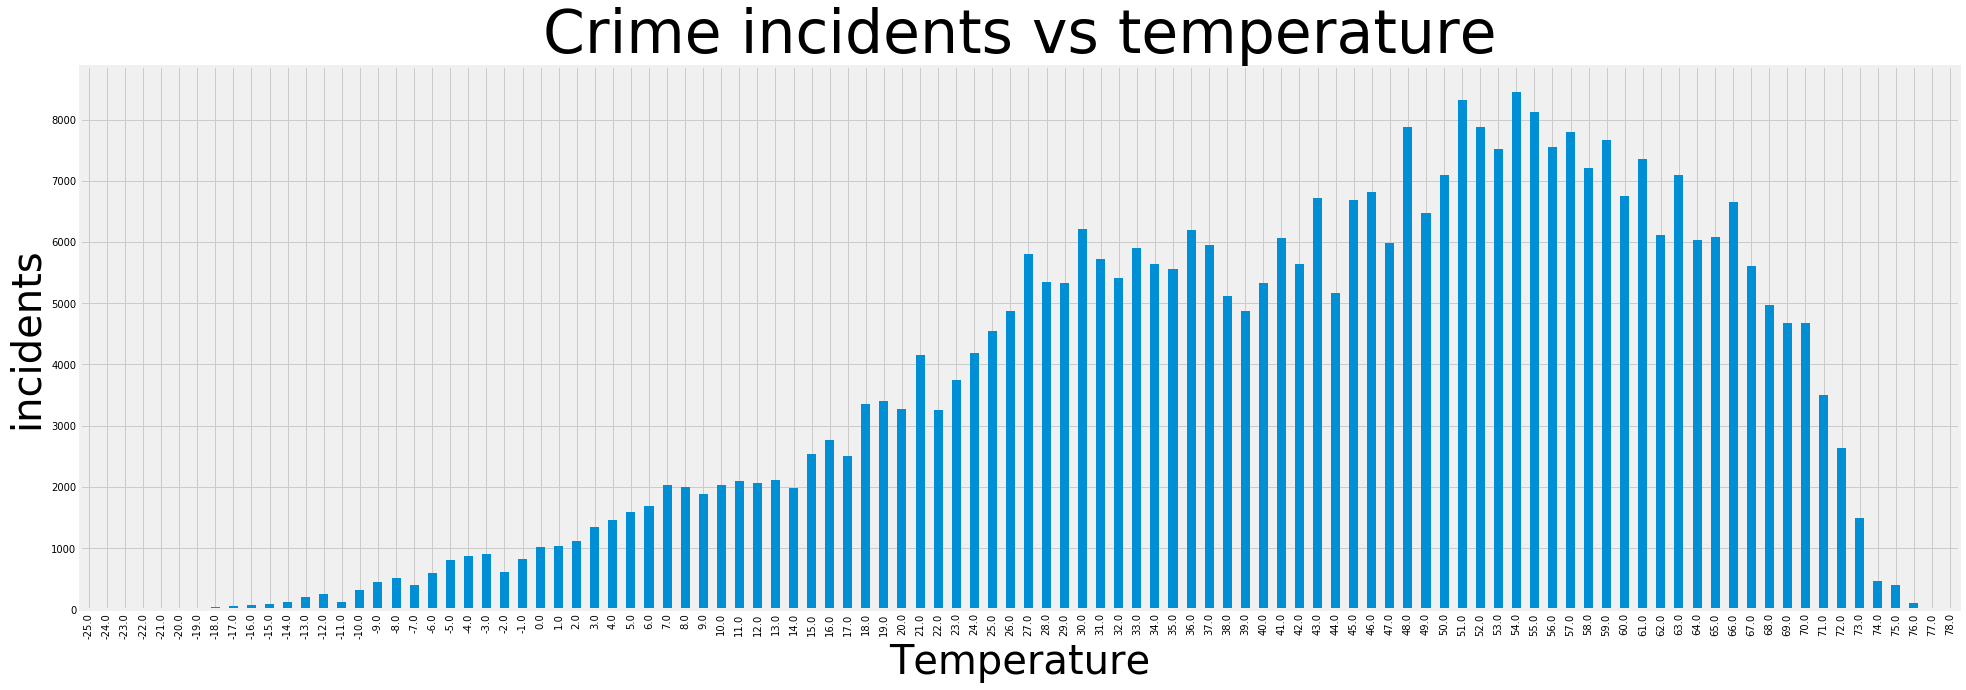

In [40]:
#type(df2.HourlyDewPointTemperature)
plt.figure(figsize=(30,10))
plt.title('Crime incidents vs temperature', size =(60))
plt.xlabel('Temperature', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df2.HourlyDewPointTemperature, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


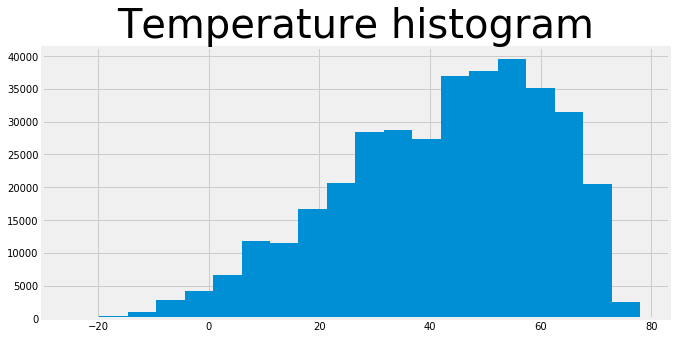

In [41]:
# Temperature histogram:

df2.HourlyDewPointTemperature.hist(bins = 20, figsize = (10,5),density = False)
plt.title('Temperature histogram', size = (40));



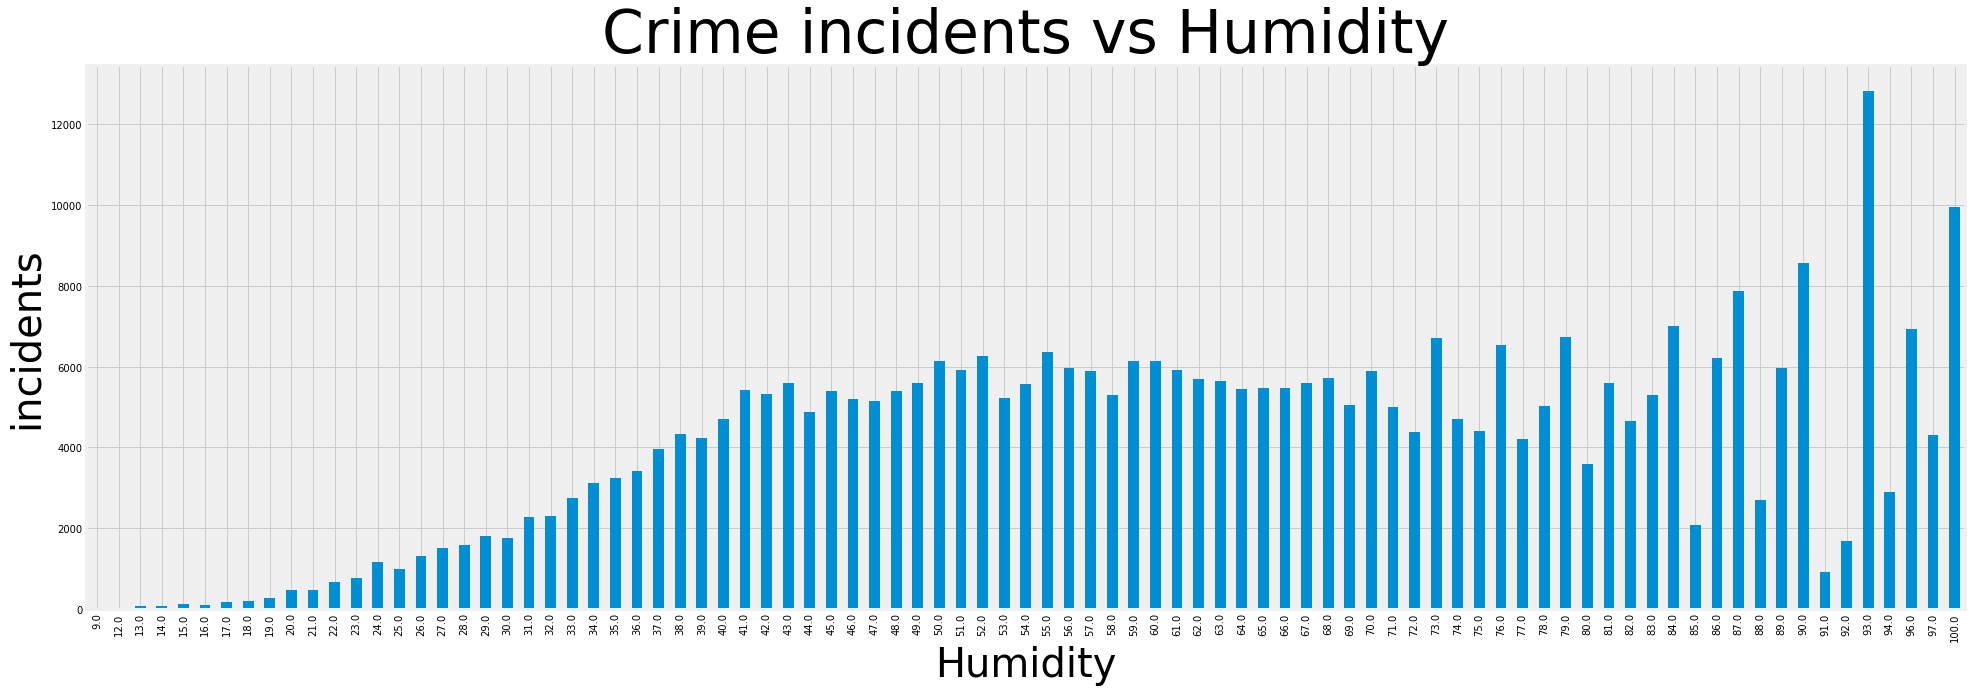

In [42]:
# Plot every weather variable vs total incidents:


plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Humidity', size =(60))
plt.xlabel('Humidity', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df2.HourlyRelativeHumidity, dtype='float64').value_counts().sort_index(
).plot(kind="bar");



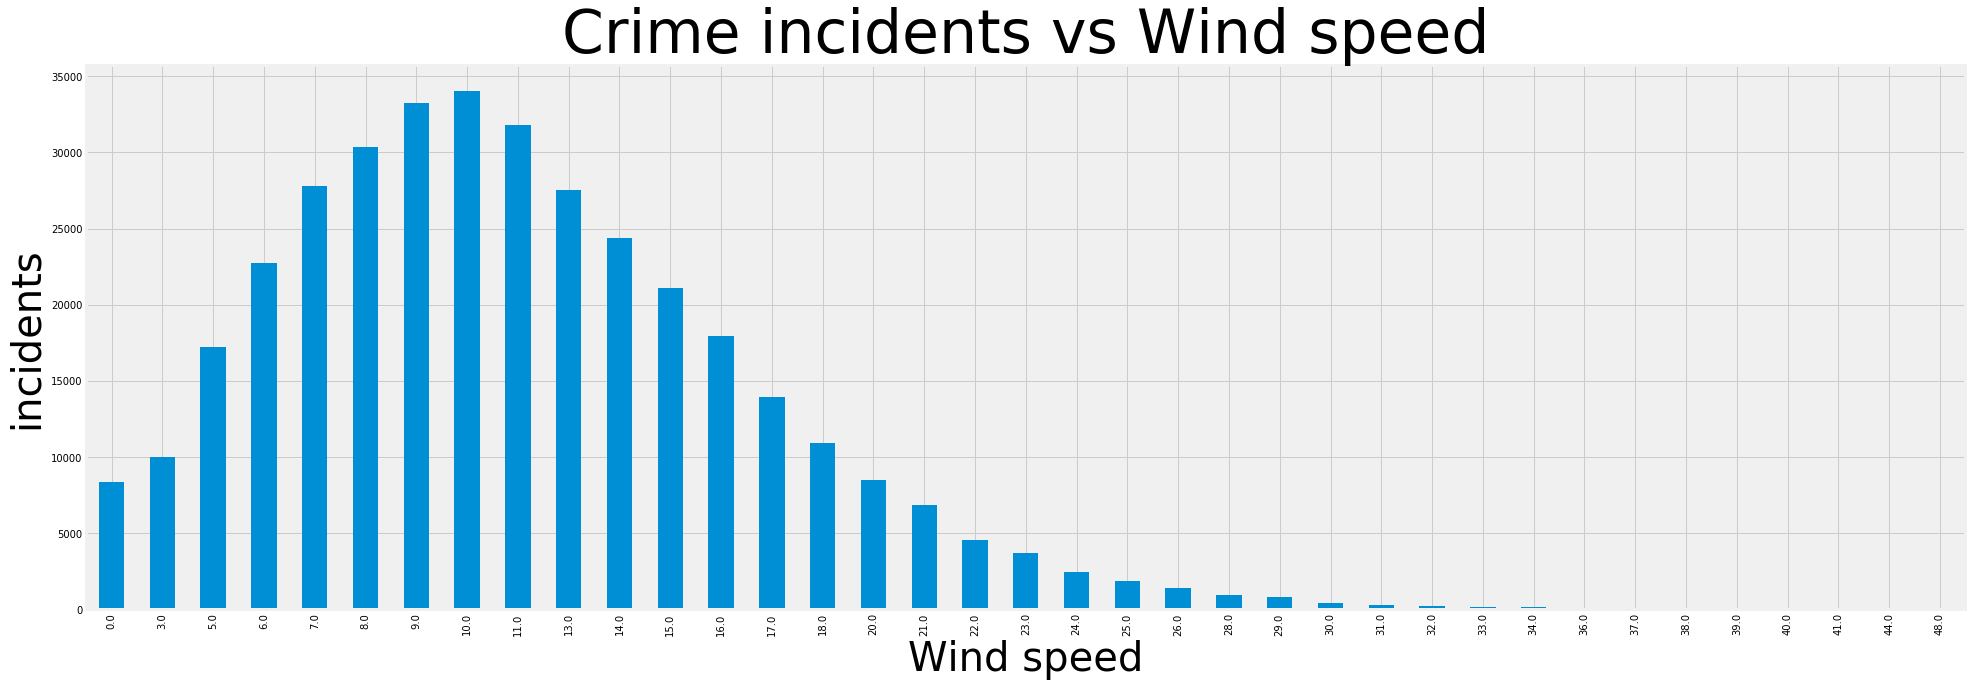

In [43]:

plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Wind speed', size =(60))
plt.xlabel('Wind speed', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df2.HourlyWindSpeed, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


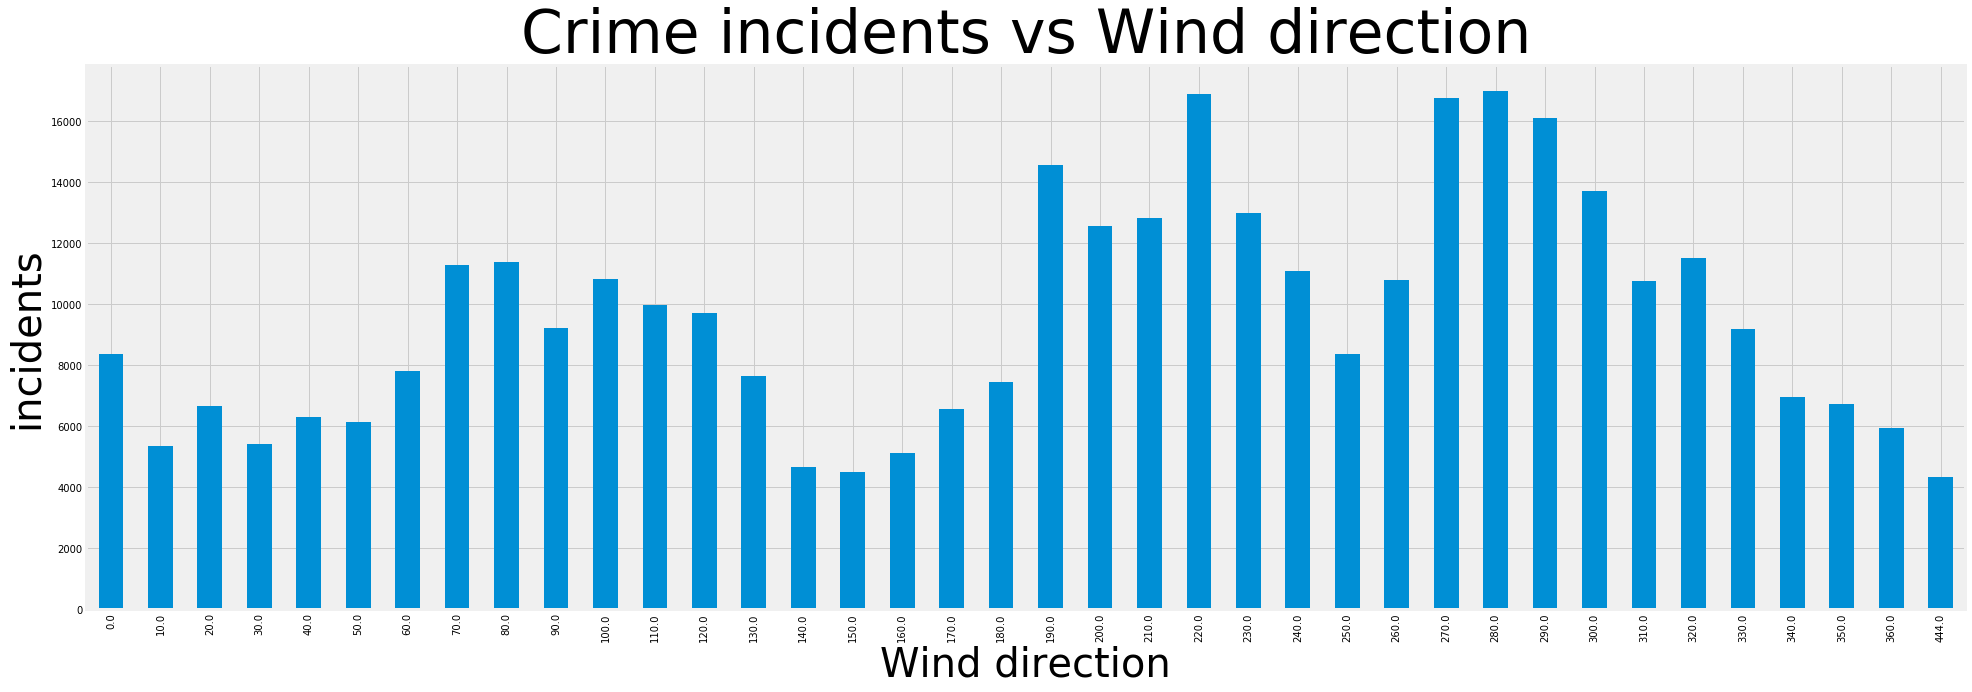

In [44]:

plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Wind direction', size =(60))
plt.xlabel('Wind direction', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df2.HourlyWindDirection, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


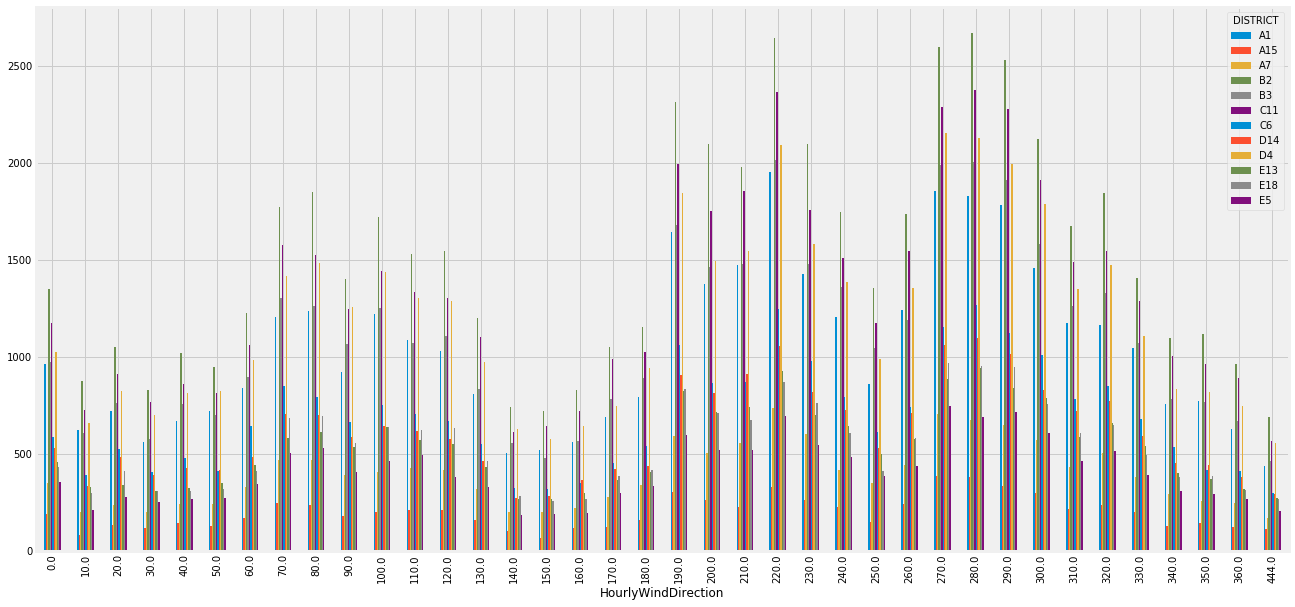

In [45]:
# Wind direction vs incidents:
df2.groupby(['HourlyWindDirection','DISTRICT']).size().unstack(fill_value=0).plot.bar(figsize=(20,10));
                                                                       

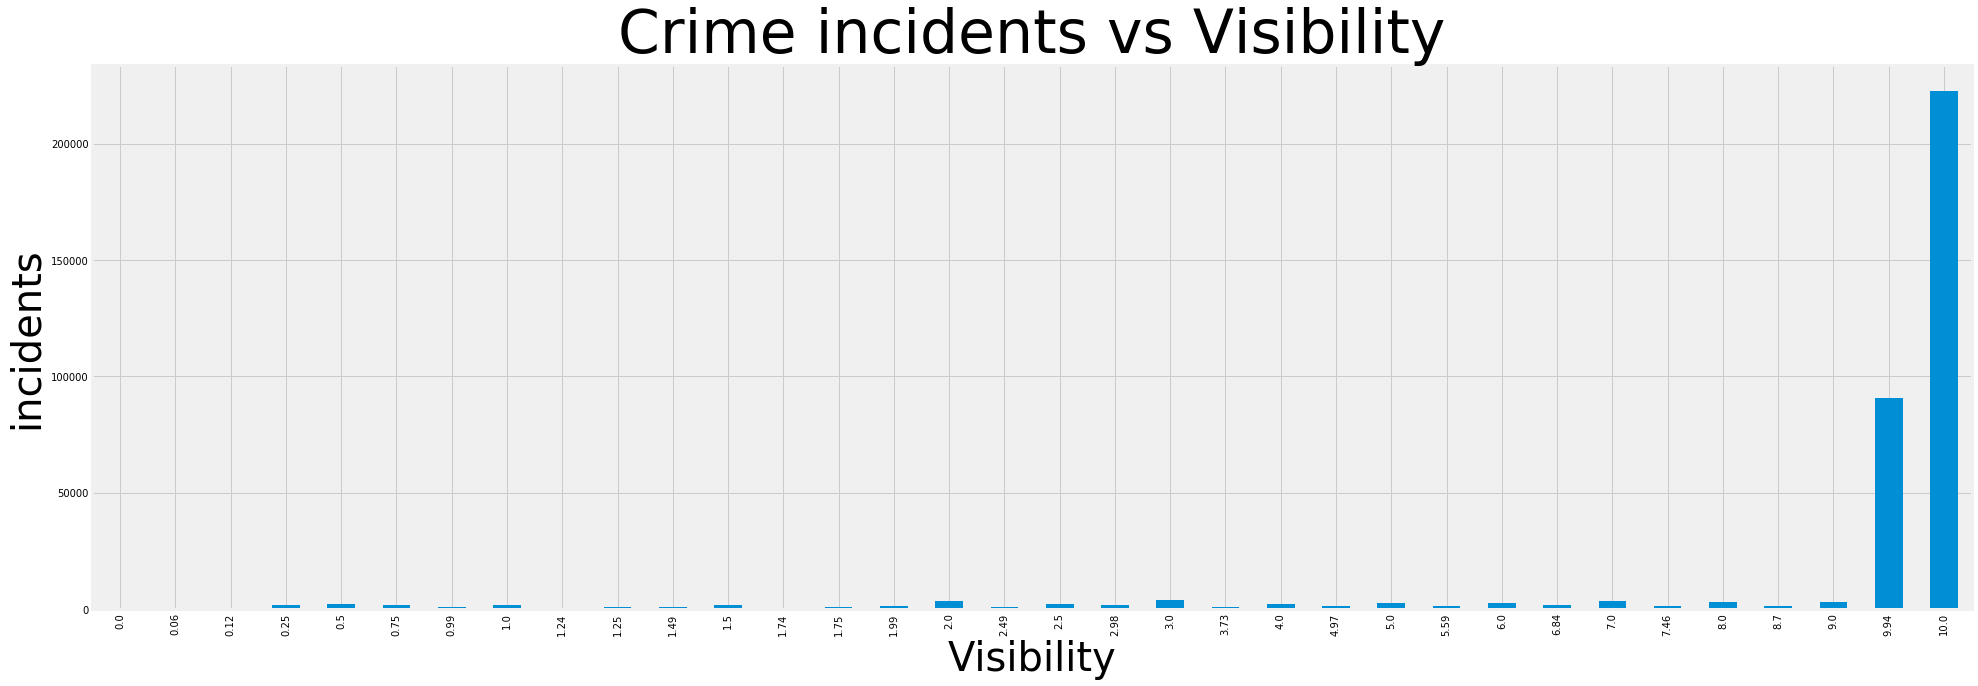

In [46]:

plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Visibility', size =(60))
plt.xlabel('Visibility', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df2.HourlyVisibility, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


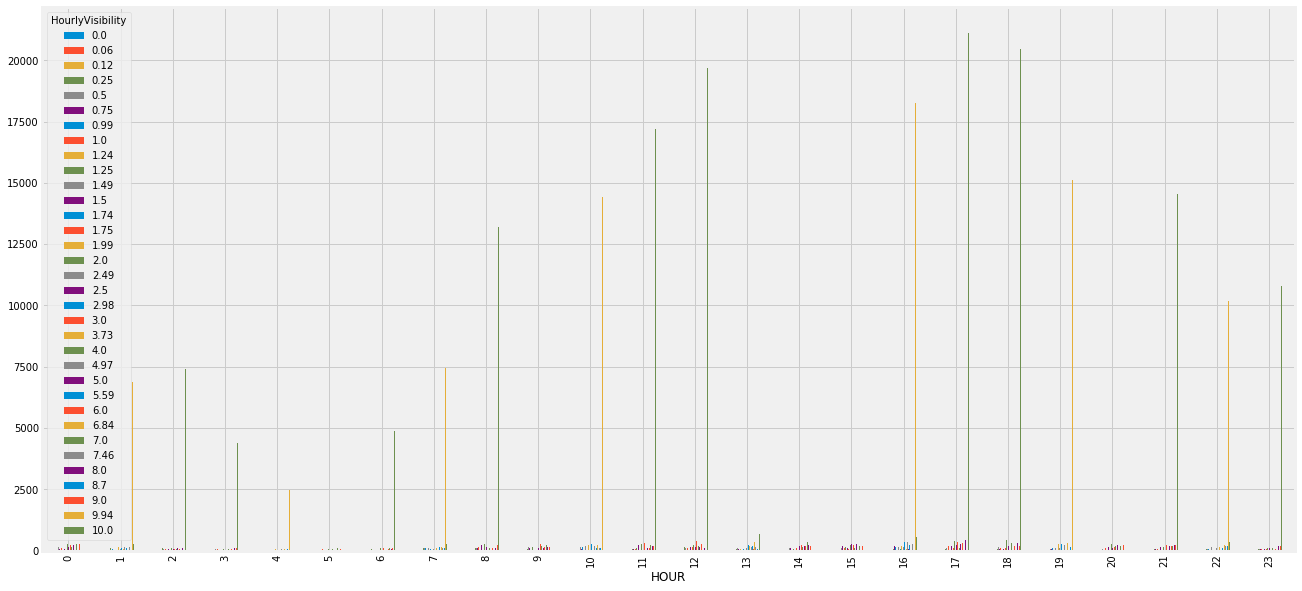

In [47]:
# Visibility vs total incidents:
df2.groupby(['HOUR','HourlyVisibility']).size().unstack(fill_value=0).plot.bar(figsize=(20,10));
                                                                       

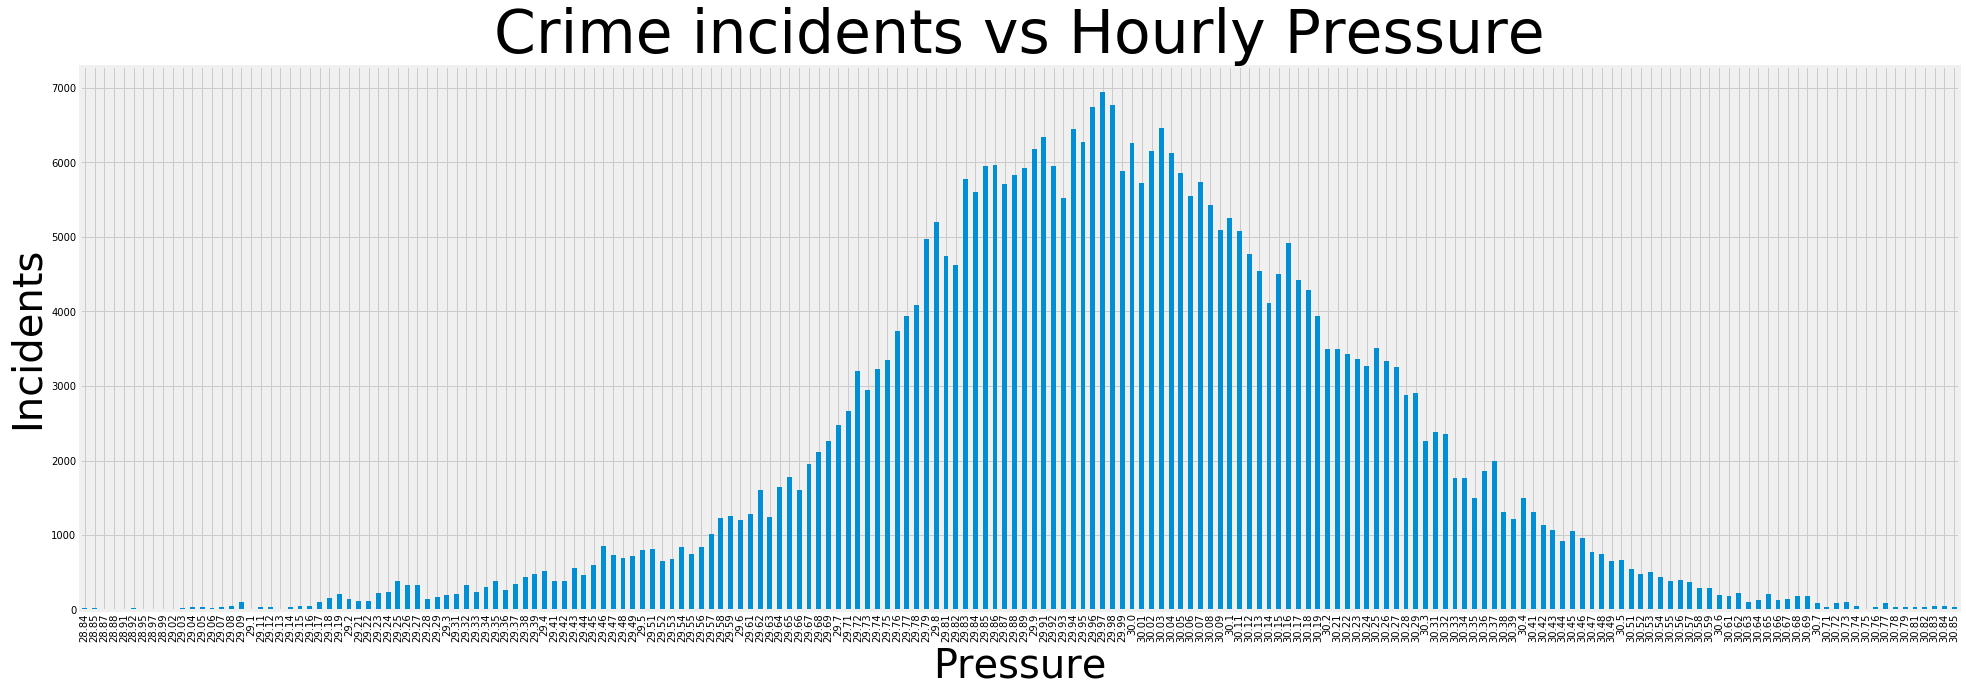

In [48]:
plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Hourly Pressure', size =(60))
plt.xlabel('Pressure', size = (40))
plt.ylabel('Incidents', size = (40))
pd.Series(df2.HourlyStationPressure, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


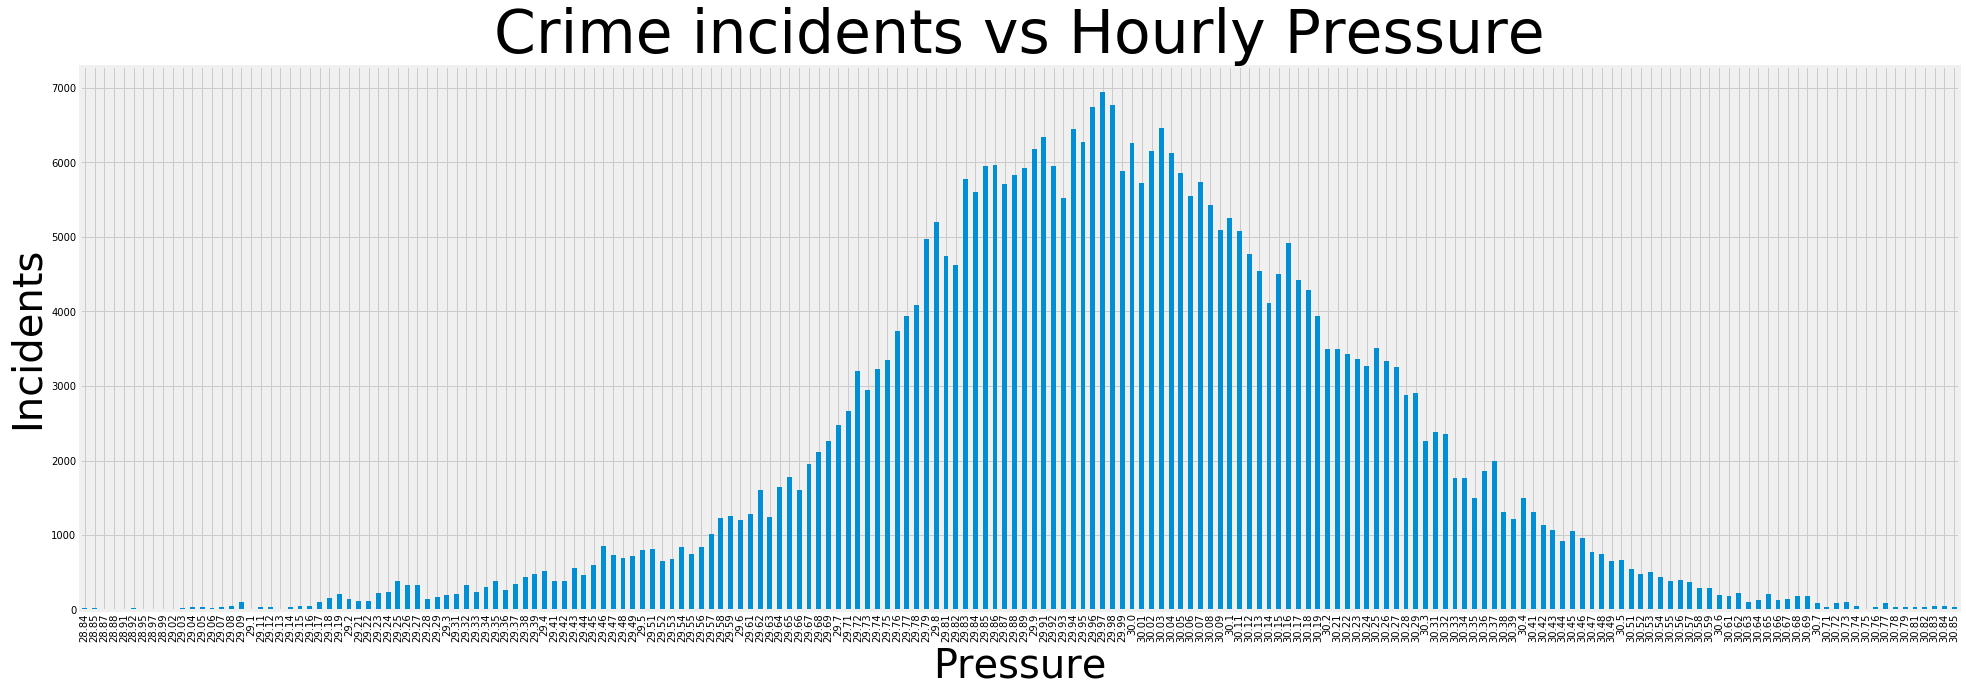

In [49]:
plt.figure(figsize=(30,10))
plt.title('Crime incidents vs Hourly Pressure', size =(60))
plt.xlabel('Pressure', size = (40))
plt.ylabel('Incidents', size = (40))
pd.Series(df2.HourlyStationPressure, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


In [50]:
df2.drop(columns = ['Unnamed: 0'], inplace = True)
#df2.columns

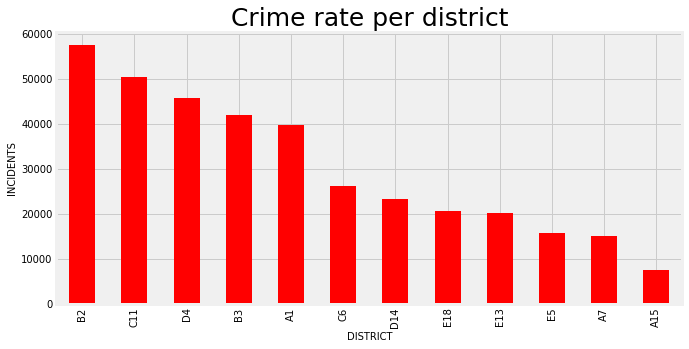

In [51]:
# Bar plot, crime rate per district:

plt.figure(figsize=(10,5))
plt.title('Crime rate per district', size =(25))
plt.xlabel('DISTRICT', size = (10))
plt.ylabel('INCIDENTS', size = (10))
df2.groupby('DISTRICT').agg('count').INCIDENT_NUMBER.sort_values(ascending = False
                                                                   ).plot(kind = 'bar',
                                                                         color = 'red');


In [52]:
# How many different offense code groups we have:
len(df2.OFFENSE_CODE_GROUP.unique())

62

Text(0, 0.5, 'Offense group')

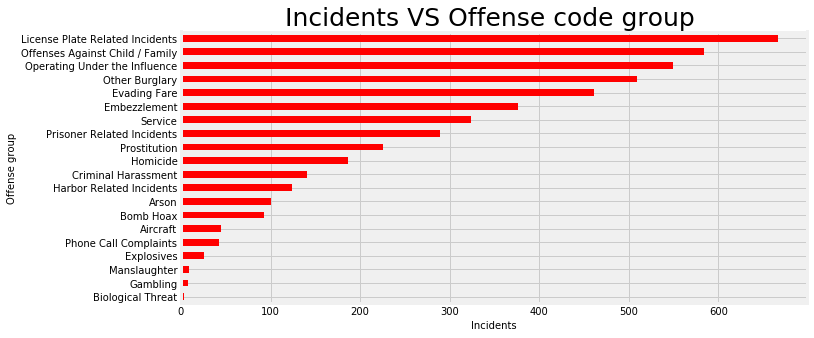

In [14]:
# Bar plot, crime rate per Offense code:

# plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
df2.groupby('OFFENSE_CODE_GROUP').agg('count').INCIDENT_NUMBER.sort_values(ascending = True
                                                                   ).head(20).plot(kind = 'barh',
                                                                         color = 'red');

plt.title('Incidents VS Offense code group ', size =(25))
plt.xlabel('Incidents', size = (10))
plt.ylabel('Offense group', size = (10))


Text(0.5, 0, 'Offense group by district ')

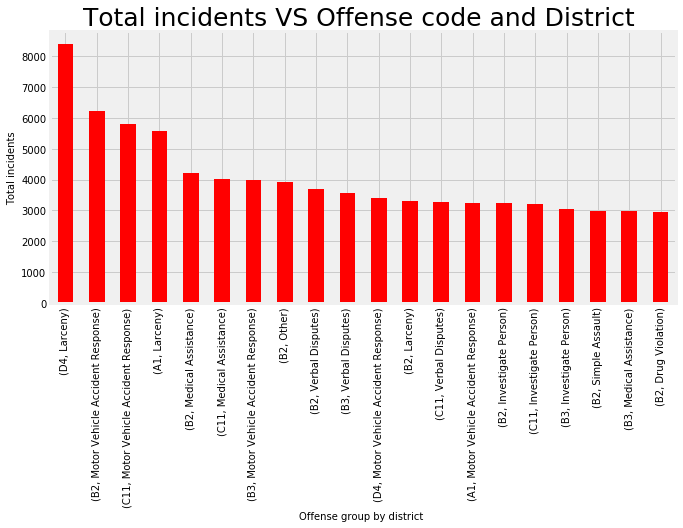

In [53]:
# Bar plot, crime rate per District and Offese code:

plt.figure(figsize=(10,5))

df2.groupby(['DISTRICT','OFFENSE_CODE_GROUP']).agg('count').INCIDENT_NUMBER.sort_values(ascending = False
                                                                   ).head(20).plot(kind = 'bar',
                                                                         color = 'red');
                                                                         

plt.title('Total incidents VS Offense code and District ', size =(25))
plt.ylabel('Total incidents', size = (10))
plt.xlabel('Offense group by district ', size = (10))


In [56]:
# Use date time format for dates columns:
df2['DATE_HOUR'] = pd.to_datetime(df2['DATE_HOUR'])
df2['DATE_ONLY'] = pd.to_datetime(df2['DATE_ONLY'])

In [57]:
df2.YEAR

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
363531    2015
363532    2015
363533    2015
363534    2015
363535    2015
Name: YEAR, Length: 363536, dtype: int64

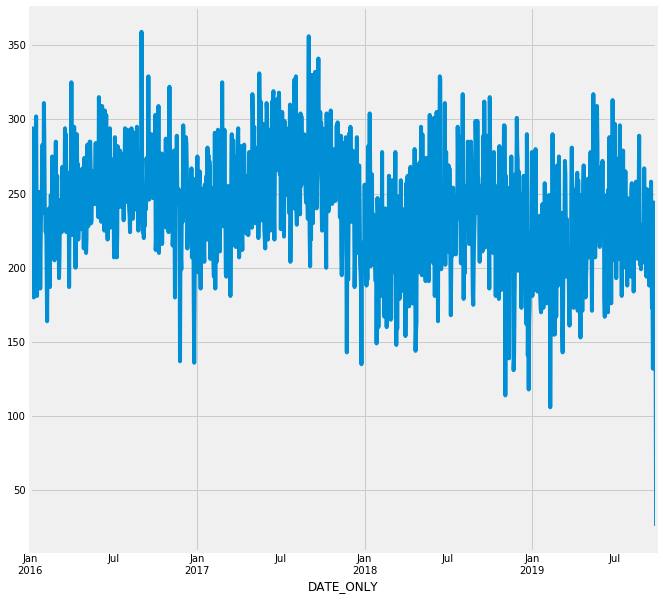

In [58]:
# considering years > 2015 :
mask = df2.YEAR > 2015
# groupyig by t he date_only will helps us to see if the data is stationary:
df2[mask].groupby('DATE_ONLY').count()['INCIDENT_NUMBER'].plot(figsize = (10,10));

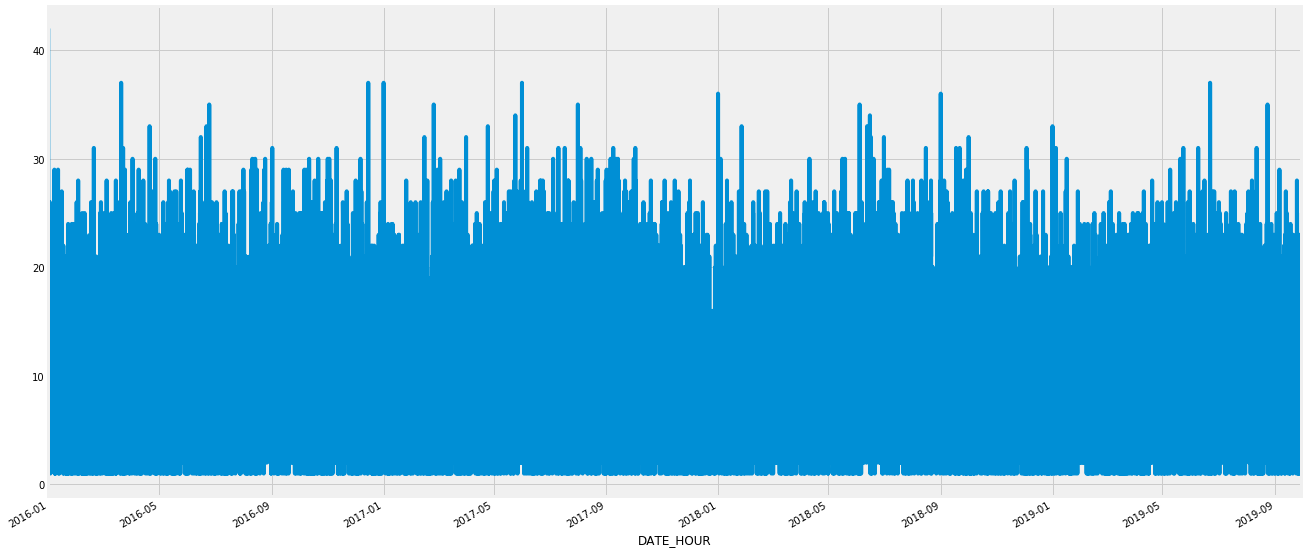

In [59]:
# groupying by date_only will helps us to see if the data is stationary:
df2[mask].groupby('DATE_HOUR').count()['INCIDENT_NUMBER'].plot(figsize = (20,10));

In [60]:
# Is important to notice that the Offense code is not an id for the offense_code group
# there are differents offense_code for the same offense_code group, so we will choose
# the offense group by the OFFENSE_CODE_GROUP and DISTRICT.

pd.set_option('display.max_rows',128)
df2.groupby(['OFFENSE_CODE','OFFENSE_CODE_GROUP']).count()['INCIDENT_NUMBER'].sort_values(ascending = False).head(60)

OFFENSE_CODE  OFFENSE_CODE_GROUP             
3006          Medical Assistance                 23126
3115          Investigate Person                 22045
3831          Motor Vehicle Accident Response    17729
1402          Vandalism                          17370
802           Simple Assault                     16997
3301          Verbal Disputes                    16216
3114          Investigate Property               13361
3410          Towed                              12999
2647          Other                              10893
3201          Property Lost                      10741
617           Larceny                            10698
614           Larceny From Motor Vehicle          9826
613           Larceny                             9637
3125          Warrant Arrests                     9099
619           Larceny                             7061
3802          Motor Vehicle Accident Response     6700
3502          Missing Person Located              5760
1102          Fraud

In [61]:
# Show some offense codes sorted by the alphabet:
pd.set_option('display.max_rows',128)
df2.sort_values('OFFENSE_CODE_GROUP').groupby(['OFFENSE_CODE_GROUP']).count()['INCIDENT_NUMBER']

OFFENSE_CODE_GROUP
Aggravated Assault                   8787
Aircraft                               45
Arson                                 101
Assembly or Gathering Violations     1000
Auto Theft                           5224
Auto Theft Recovery                  1181
Ballistics                           1148
Biological Threat                       3
Bomb Hoax                              93
Commercial Burglary                  1503
Confidence Games                     3608
Counterfeiting                       1728
Criminal Harassment                   141
Disorderly Conduct                   2688
Drug Violation                      17559
Embezzlement                          376
Evading Fare                          461
Explosives                             26
Fire Related Reports                 2190
Firearm Discovery                     777
Firearm Violations                   1956
Fraud                                7472
Gambling                                8
Harassment     

In [65]:
# Same but with districts:
pd.set_option('display.max_rows',128)
df2.groupby(['DISTRICT','OFFENSE_CODE_GROUP']).count()['INCIDENT_NUMBER'].sort_values(ascending = False).head(10)

DISTRICT  OFFENSE_CODE_GROUP             
D4        Larceny                            8379
B2        Motor Vehicle Accident Response    6227
C11       Motor Vehicle Accident Response    5806
A1        Larceny                            5560
B2        Medical Assistance                 4229
C11       Medical Assistance                 4020
B3        Motor Vehicle Accident Response    3996
B2        Other                              3910
          Verbal Disputes                    3704
B3        Verbal Disputes                    3580
Name: INCIDENT_NUMBER, dtype: int64

In [121]:
# Set date and hour as the index
df3 = df2.set_index('DATE_HOUR')

# Create Total incidens column:
df3['TOTAL_INCIDENT'] = df3.groupby('DATE_HOUR').count()['INCIDENT_NUMBER']
df3.TOTAL_INCIDENT

DATE_HOUR
2019-09-29 06:00:00    2
2019-09-29 03:00:00    4
2019-09-29 06:00:00    2
2019-09-29 04:00:00    4
2019-09-29 04:00:00    4
                      ..
2015-08-21 20:00:00    3
2015-08-17 00:00:00    7
2015-08-21 09:00:00    2
2015-08-21 21:00:00    1
2015-08-17 11:00:00    1
Name: TOTAL_INCIDENT, Length: 363536, dtype: int64

Text(0.5, 1.0, 'Total incident ')

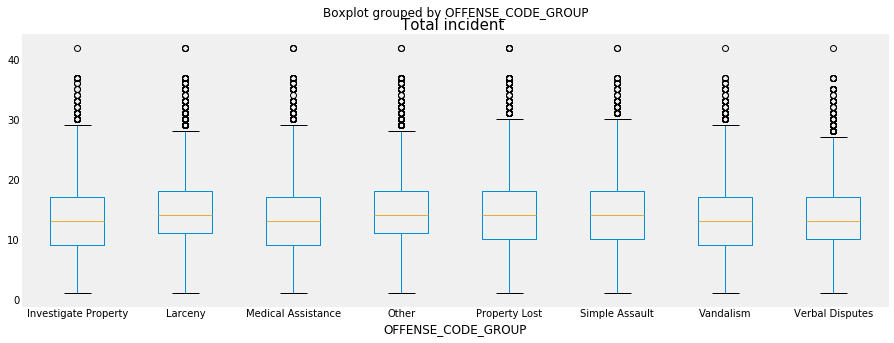

In [120]:
# Select the most common offense code groups:

OFFENSE_list5 = ['Medical Assistance',                
          'Investigate Person'                
          'Motor Vehicle Accident Response',
          'Vandalism',                         
           'Simple Assault',                     
          'Verbal Disputes',                   
          'Investigate Property',               
          'Towe`bd',                             
          'Other',                              
          'Property Lost',                      
           'Larceny']                           
          

mask1 = (df3.OFFENSE_CODE_GROUP.isin(OFFENSE_list5))
df3[mask1].boxplot(by ='OFFENSE_CODE_GROUP', column =['TOTAL_INCIDENT'], grid = False, figsize = (15,5)) 
plt.title('Total incident ', size = (15))

In [122]:
# Limit the problem to Larcery cases:
OFFENSE_list = ['Larceny']

mask = (df3.OFFENSE_CODE_GROUP.isin(OFFENSE_list))
df3 = df3[mask]

df3.OFFENSE_CODE_GROUP.unique()

array(['Larceny'], dtype=object)

In [123]:
df3.shape
df3.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location', 'STATION', 'DATE', 'REPORT_TYPE',
       'SOURCE', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit',
       'BackupElements', 'BackupElevation', 'BackupEquipment',
       'BackupLatitude', 'BackupLongitude', 'BackupName',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 'HourlySkyConditions',
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindDirection', 'HourlyWindSpeed', 'REM', 'REPORT_TYPE.1',
       'SOURCE.1', 'WindEquipmentChangeDate', 'DATE_ONLY', 'TOTAL_INCIDENT'],
      dtype='object')

Text(0.5, 1.0, 'Day of Week vs Vandalism')

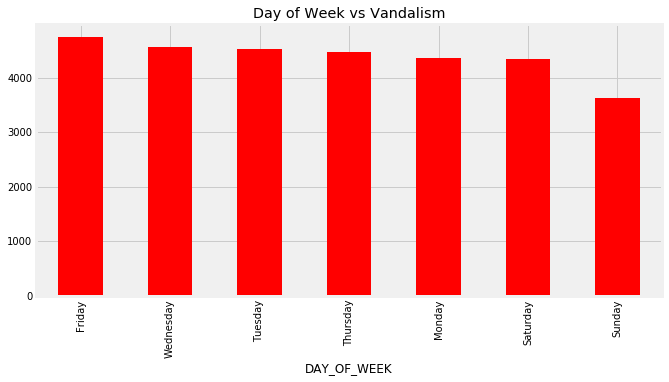

In [124]:
# Exploratory data for Vandalism:
# Data visualization:
plt.figure(figsize=(10,5))
df3.groupby('DAY_OF_WEEK').agg('count').INCIDENT_NUMBER.sort_values(ascending = False
                                                                   ).plot(kind = 'bar',
                                                                         color = 'red');
plt.title('Day of Week vs Vandalism')


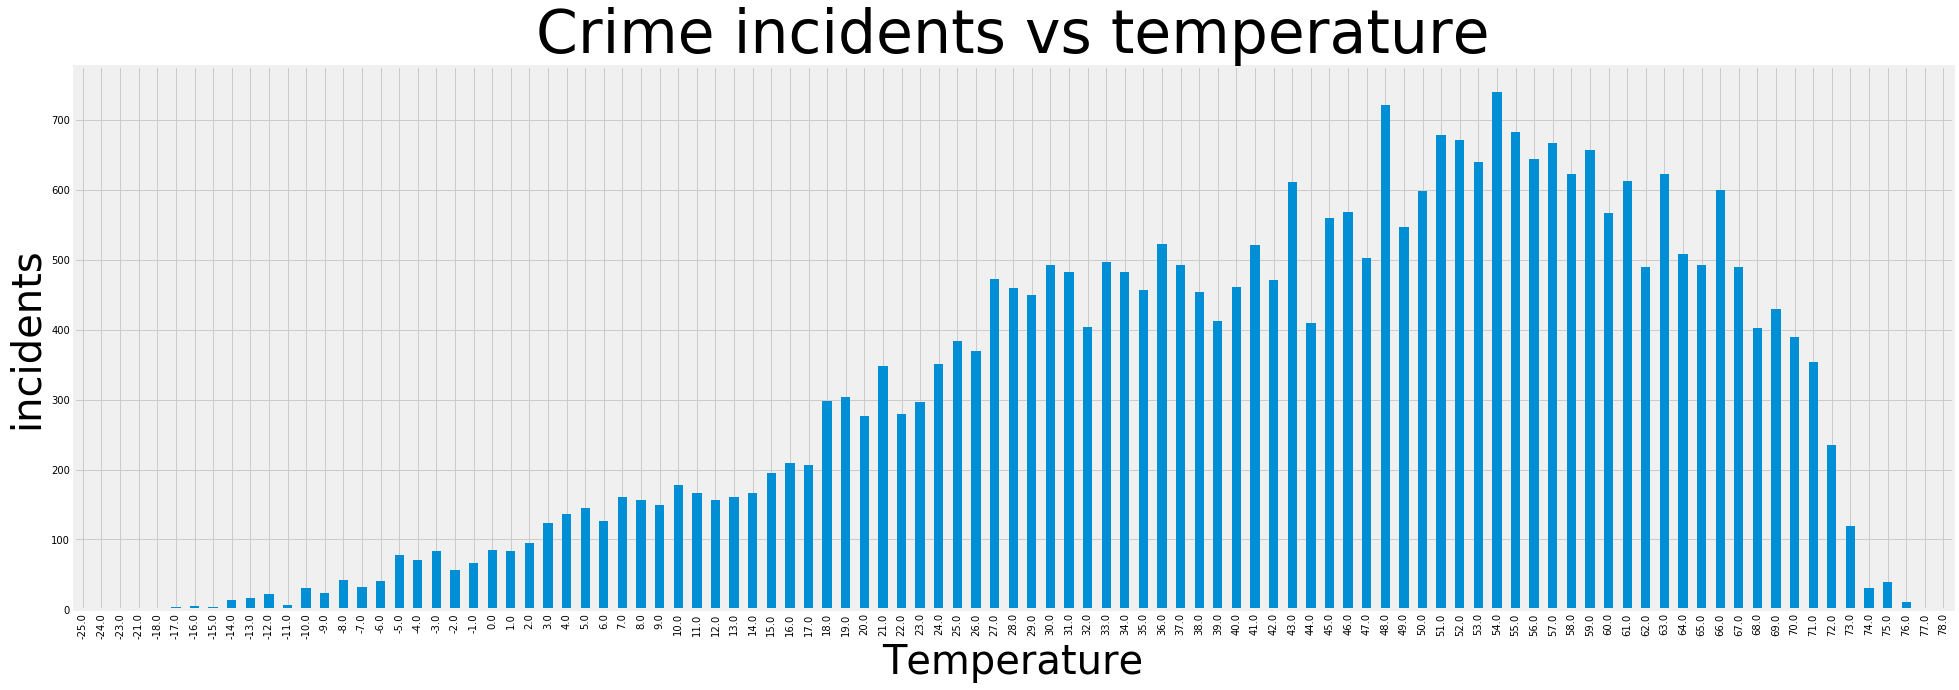

In [125]:
#type(df2.HourlyDewPointTemperature)
plt.figure(figsize=(30,10))
plt.title('Crime incidents vs temperature', size =(60))
plt.xlabel('Temperature', size = (40))
plt.ylabel('incidents', size = (40))
pd.Series(df3.HourlyDewPointTemperature, dtype='float64').value_counts().sort_index(
).plot(kind="bar");


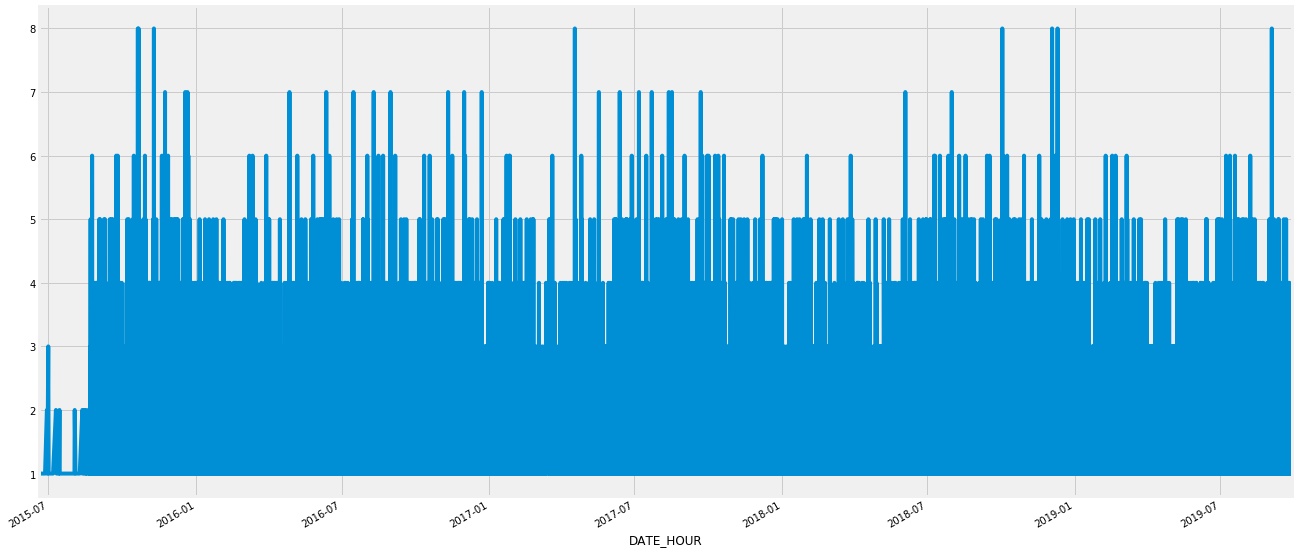

In [126]:
# groupyig by t he date will helps us to see if the data is stationary:
df3.groupby('DATE_HOUR').count()['INCIDENT_NUMBER'].plot(figsize = (20,10));

In [127]:

# Drop columns we will not use:
df3.drop(columns = ['INCIDENT_NUMBER', 'OFFENSE_CODE',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'YEAR',
       'OCCURRED_ON_DATE', 'UCR_PART',
       'STREET', 'STATION', 'DATE', 'REPORT_TYPE', 'SOURCE','Location',
       'BackupDirection', 'BackupDistance', 'BackupDistanceUnit',
       'BackupElements', 'BackupElevation', 'BackupEquipment',
       'BackupLatitude', 'BackupLongitude', 'BackupName',
       'REM', 'REPORT_TYPE.1',
       'SOURCE.1'], inplace = True)

df3.columns

Index(['OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'Lat', 'Long', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyRelativeHumidity',
       'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'WindEquipmentChangeDate', 'DATE_ONLY', 'TOTAL_INCIDENT'],
      dtype='object')

In [128]:
# For which hour there is more total incidents?
df3.groupby('HOUR').TOTAL_INCIDENT.describe()

,count,mean,std,min,25%,50%,75%,max
HOUR,,,,,,,,
0,1238.0,14.028271,6.292520,1.0,10.00,13.0,17.0,42.0
1,385.0,9.742857,5.238962,1.0,6.00,9.0,12.0,33.0
2,359.0,8.013928,4.164538,1.0,5.00,7.0,11.0,25.0
3,215.0,5.400000,3.242245,1.0,3.00,5.0,7.0,15.0
4,143.0,4.097902,2.308328,1.0,3.00,4.0,5.0,13.0
5,164.0,3.878049,2.056802,1.0,2.75,3.0,5.0,11.0
6,277.0,5.306859,2.335080,1.0,4.00,5.0,7.0,13.0
7,512.0,8.599609,3.511491,1.0,6.00,8.0,10.0,22.0
8,1103.0,11.902085,4.337971,1.0,9.00,12.0,14.0,28.0


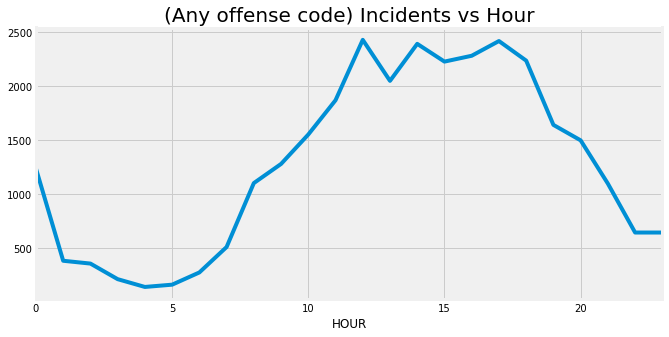

In [144]:
#  Make a plot:
df3.groupby('HOUR').TOTAL_INCIDENT.count().plot(figsize = (10,5))
plt.title('(Any offense code) Incidents vs Hour', size = (20));

In [147]:
# Exaclty for which hour we have the maximun incidents?
df3[df3.OFFENSE_CODE_GROUP == 'Larceny'].groupby('HOUR').TOTAL_INCIDENT.count().sort_values(ascending = False).head(1)

HOUR
12    2427
Name: TOTAL_INCIDENT, dtype: int64

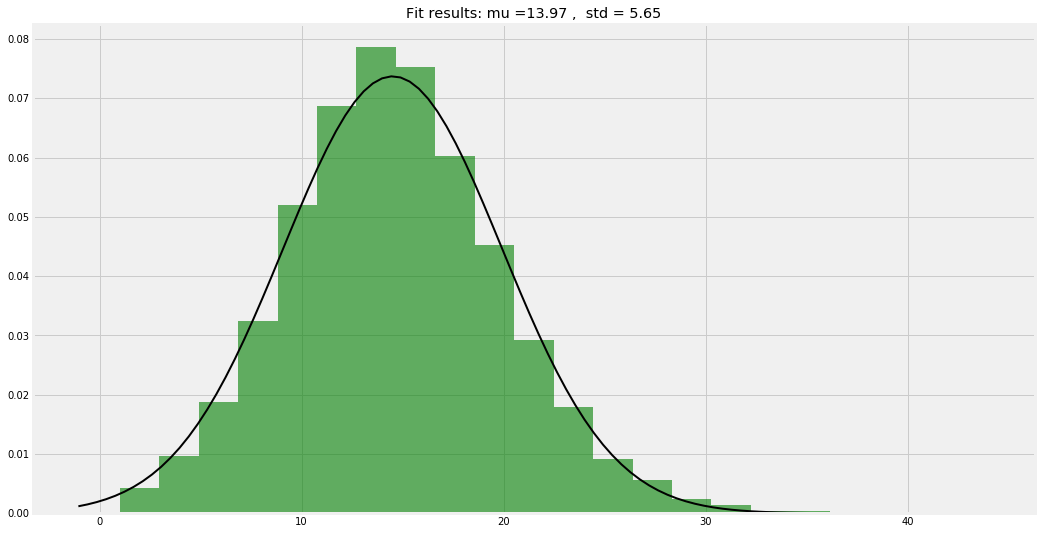

In [153]:
from scipy.stats import norm

# Plot the histogram.
yy = df3.TOTAL_INCIDENT
plt.hist(yy, bins=21, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, yy.mean(), yy.std())
plt.plot(x, p, 'k', linewidth=2)

# Format
title = "Fit results: mu =13.97 ,  std = 5.65"
plt.title(title)
plt.show()


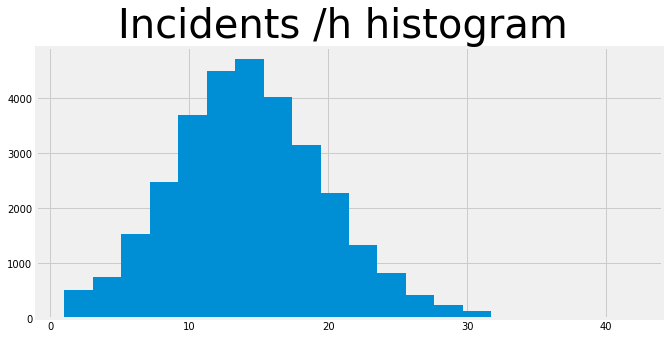

In [133]:
# without density:
df3.TOTAL_INCIDENT.hist(bins = 20, figsize = (10,5),density = False)
plt.title('Incidents /h histogram ', size = (40));



In [155]:
# Here we rename the data frame and remove any hour with duplocates
df4 = df3.loc[~df3.index.duplicated(keep='first')]
df4.shape

(17785, 20)

# Rolling mean, exp mean and weighted mean:

In [156]:
# Now to be able to understand more the Larcery trough the year lest compute the rolling and exponential means:
# Lest use days since we are working with hours and with a window of 7 to see weekly: you can play with this 
# paramether to identify any seasons or paterns on the data:
rolling_mean = df4.TOTAL_INCIDENT.resample('D').sum().rolling(window=7, center=True).mean()
exp_weighted_mean = df4.TOTAL_INCIDENT.resample('D').sum().ewm(span=7).mean()

Text(0.5, 0, 'Time')

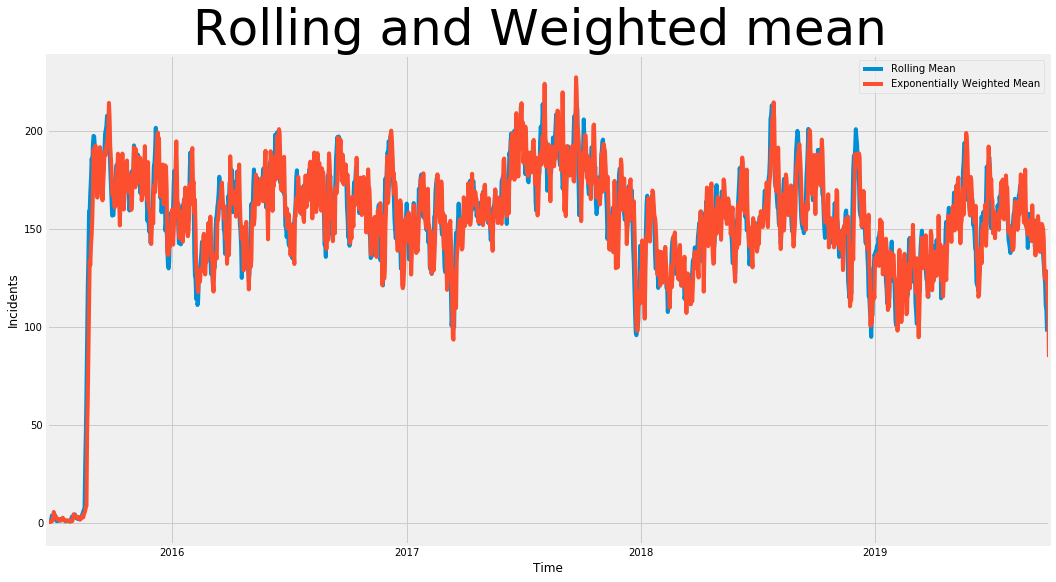

In [157]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()

rolling_mean.plot(legend = True)
exp_weighted_mean.plot(legend = True)

ax.legend(['Rolling Mean', 'Exponentially Weighted Mean'])
plt.title('Rolling and Weighted mean ', size = (50))
plt.ylabel('Incidents')
plt.xlabel('Time')

In [165]:
# Sort index:
df4.sort_index(inplace = True)


Text(0.5, 0, 'Time')

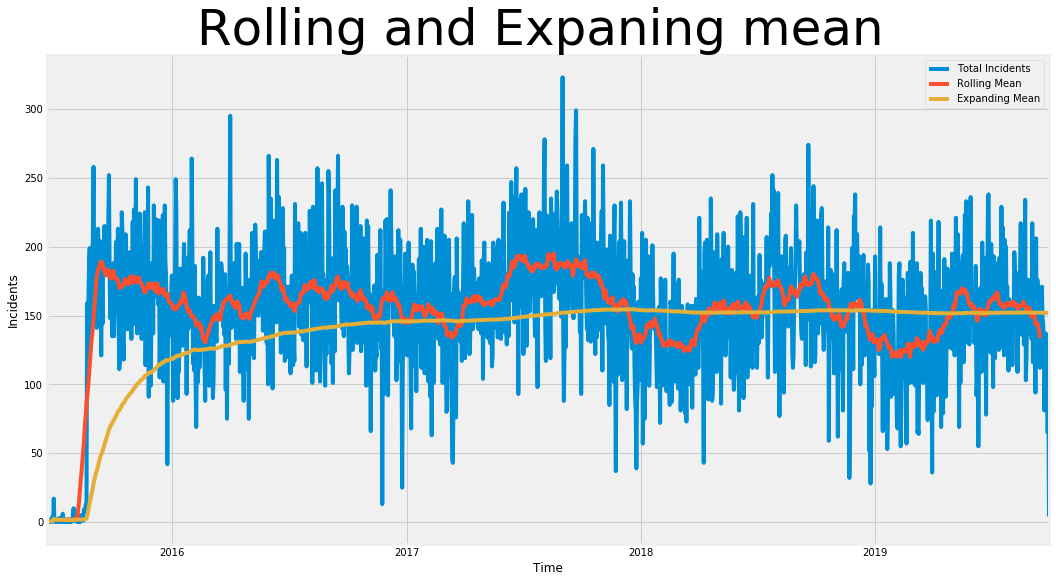

In [166]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()

df4.TOTAL_INCIDENT.resample('D').sum().plot(legend = True)
rolling_mean.plot(legend = True)
expanding_mean.plot(legend = True)

ax.legend([ 'Total Incidents','Rolling Mean', 'Expanding Mean'])

plt.title('Rolling and Expaning mean ', size = (50))
plt.ylabel('Incidents')
plt.xlabel('Time')

# Trends, seasonality and noise?

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

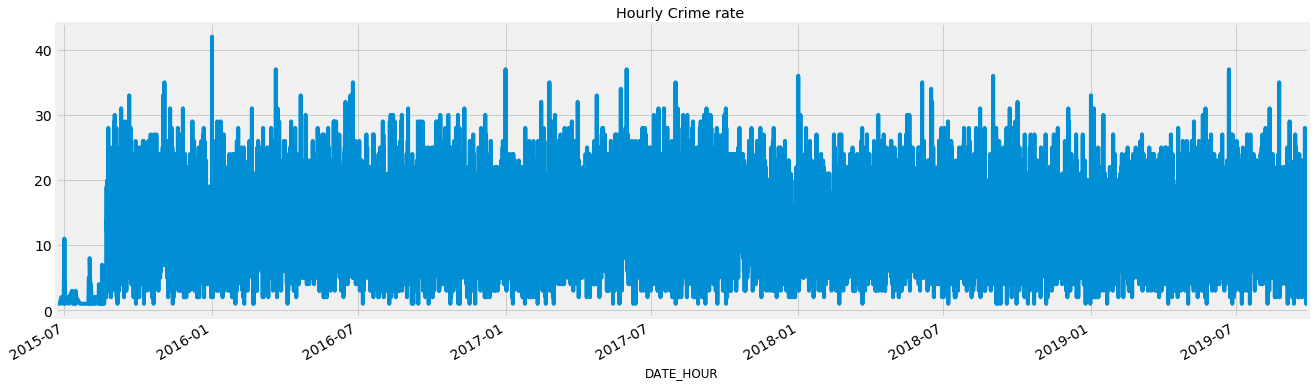

In [163]:
# We can descommpose using statsmodel library:
df4.TOTAL_INCIDENT.plot(figsize=(20,6), title= 'Hourly Crime rate ', fontsize=14)

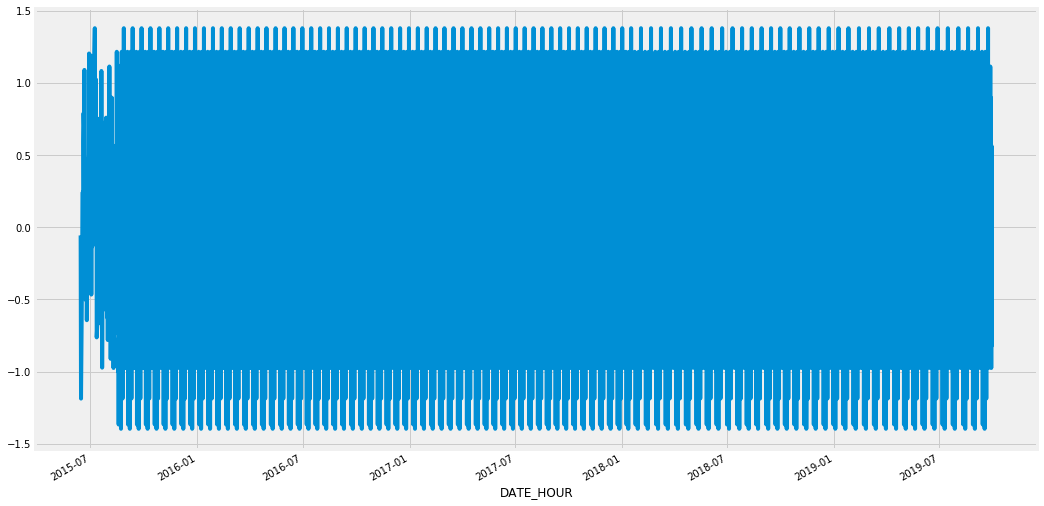

In [201]:
# Take only the seasonal:
seasonal = decomposition.seasonal 
seasonal.plot()

/home/alannia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 1152x648 with 0 Axes>

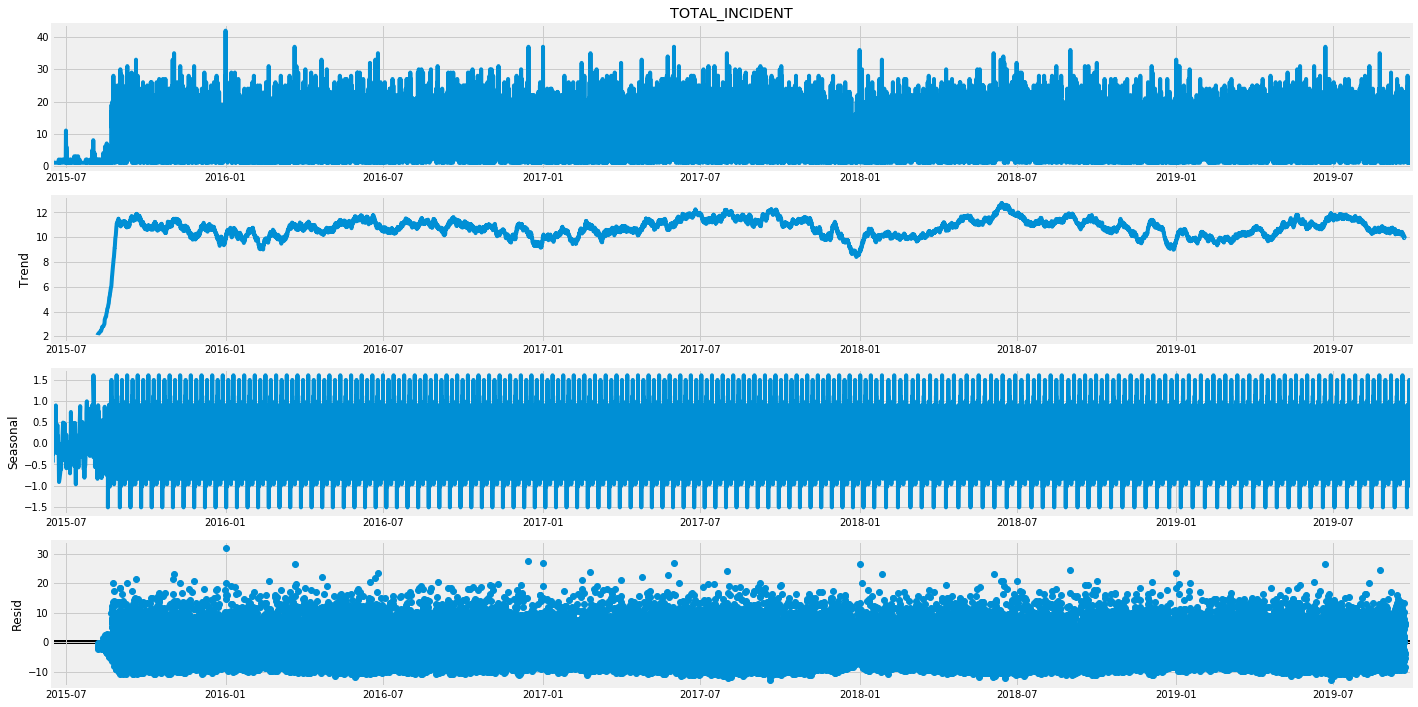

In [518]:
# Make a plot of the total descomposition: we can see the trend, seasonal and noise:
decomposition = seasonal_decompose(df4.TOTAL_INCIDENT, freq=12*24)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)

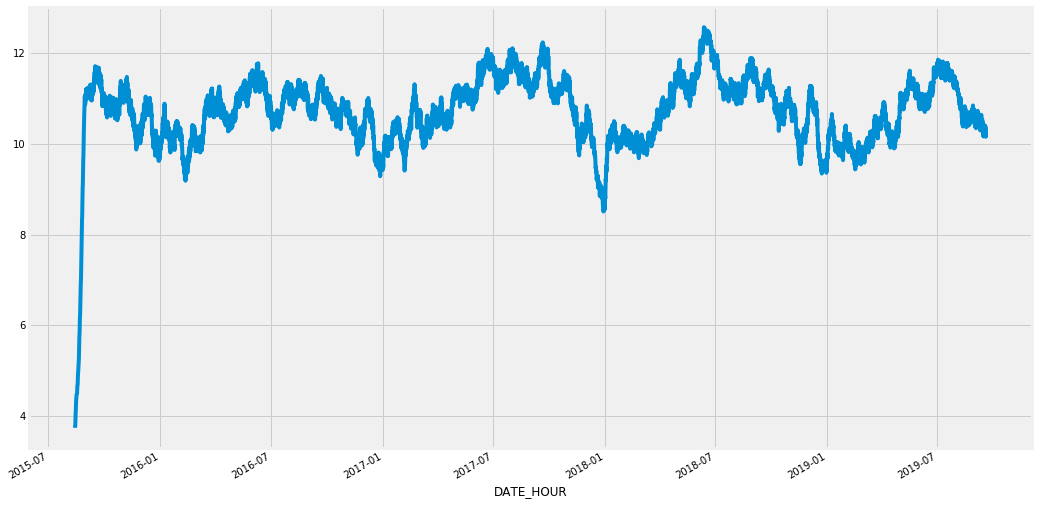

In [204]:
trend = decomposition.trend
trend.plot()

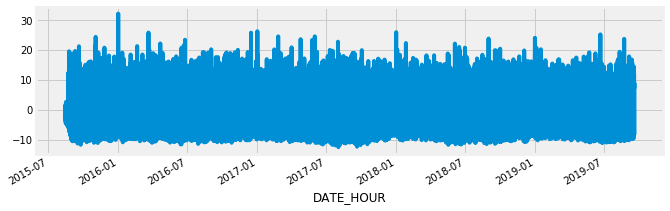

In [205]:
fig, ax = plt.subplots(figsize=(10,3))
resid = decomposition.resid
resid.plot()

In [206]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

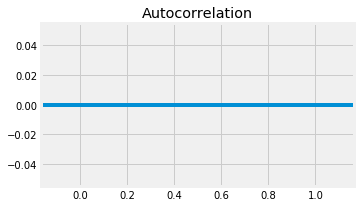

In [207]:
# Are the residuals autocorrelated?
fig, ax = plt.subplots(figsize=(5,3))
plot_acf(resid, lags=30, ax = ax)
plt.show()

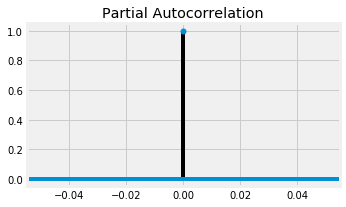

In [208]:
# Are the resuduals partialy correlated?
fig, ax = plt.subplots(figsize=(5,3))
plot_pacf(resid, lags=30, ax=ax)
plt.show()

In [209]:
# After examint the autocorrelation and partial correlation in the residual data, 
# we know they are not significantly autocorrelated. 

# Is there any sing of correlation?

In [210]:
df4['TOTAL_INCIDENT'].autocorr(lag =1)

0.5263254175165885

In [211]:
df4['TOTAL_INCIDENT'].autocorr(lag =5)

0.07998967211342321

In [212]:
df4['TOTAL_INCIDENT'].autocorr(lag =10)


-0.3058497795804536

In [213]:
df4['TOTAL_INCIDENT'].autocorr(lag =365)


-0.17633585114195013

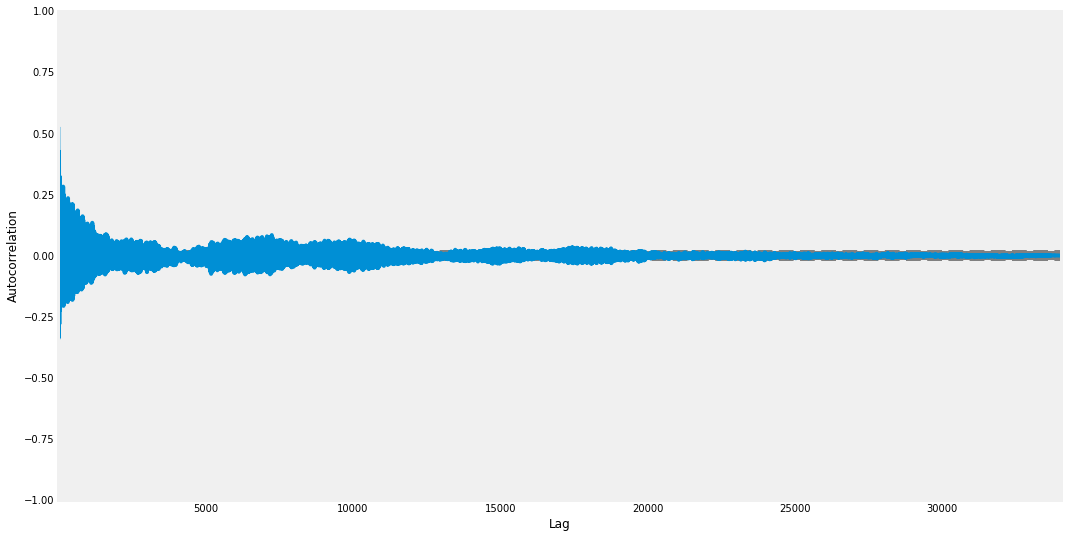

In [214]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df4.TOTAL_INCIDENT)

# Is the mean, median and variance stationary?
# Trend(line/poly)? seasonality(f(t)?  and residuals(mu,std)?

In [215]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

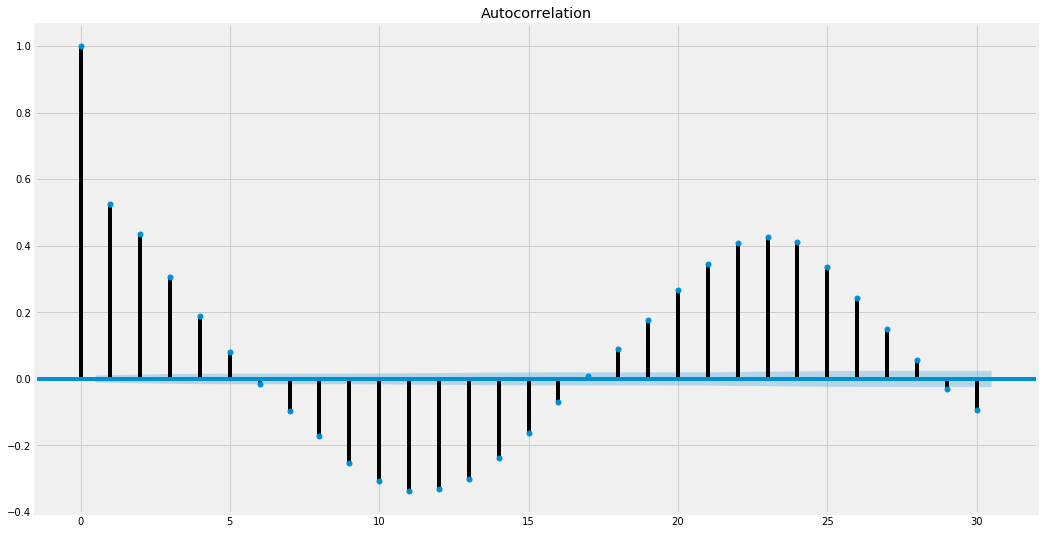

In [216]:
plot_acf(df4.TOTAL_INCIDENT, lags=30)
plt.show()



In [217]:
#plot_pacf(df3.TOTAL_INCIDENT, lags=60)
#plt.show()

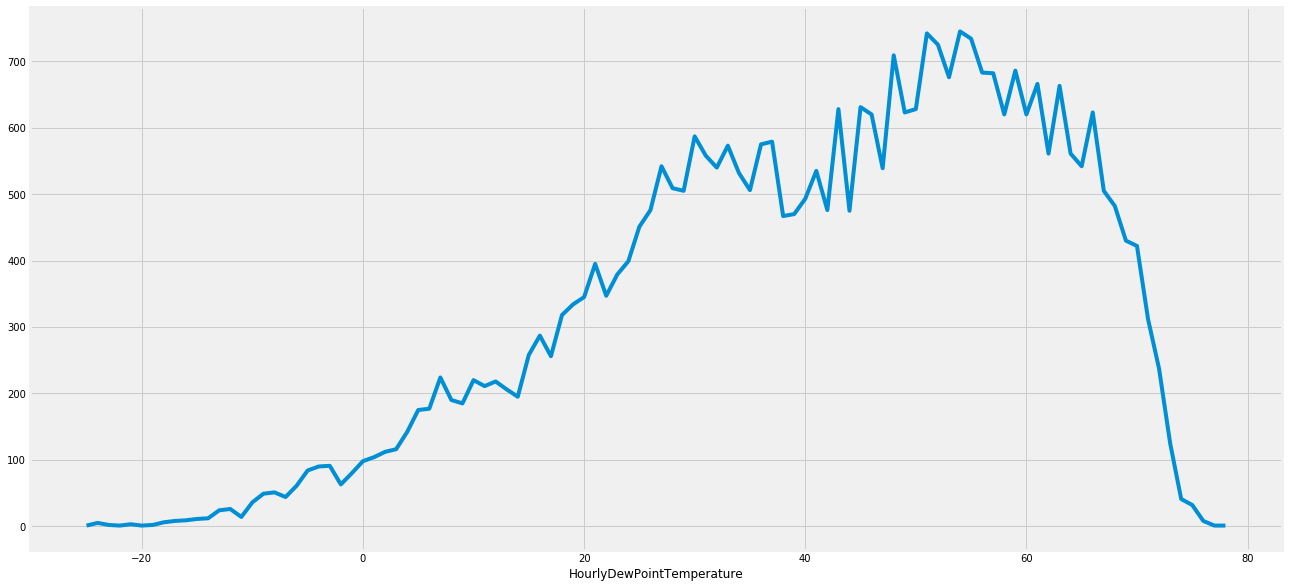

In [218]:
# grouping by temperature:
#df2['HourlyDewPointTemperature'] = df2.HourlyDewPointTemperature.astype(np.float)

#Plotting:
df4.groupby('HourlyDewPointTemperature').count()['TOTAL_INCIDENT'].plot(figsize = (20,10));


Text(0.5, 1, 'Auto correlation heat map')

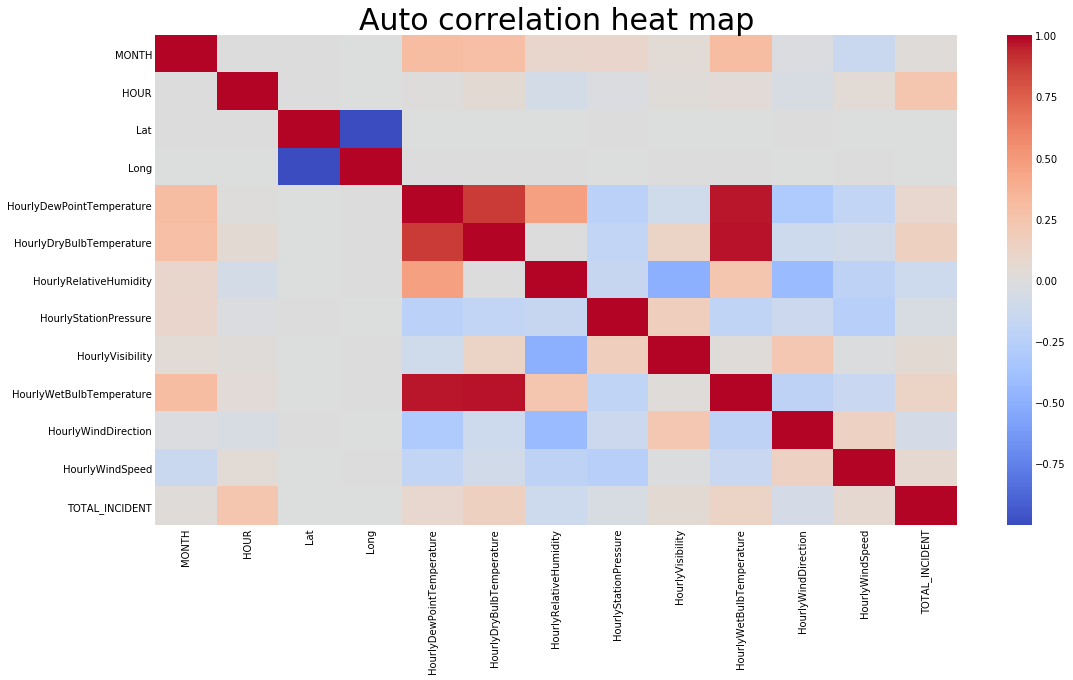

In [240]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(df3.corr(), cmap='coolwarm');
plt.title('Auto correlation heat map', size = (30))


Text(0.5, 1, 'Total incidents vs Temperature')

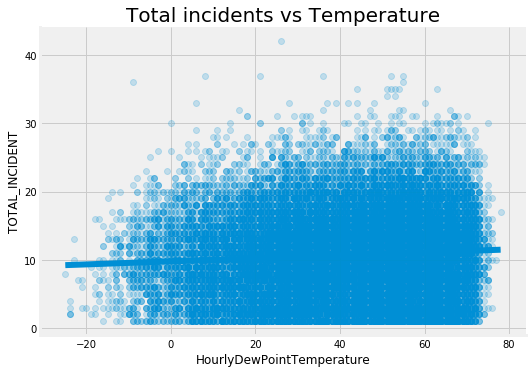

In [264]:
# Seaborn scatterplot with regression line
sns.lmplot(x='HourlyDewPointTemperature', y='TOTAL_INCIDENT', data=df4, aspect=1.5, scatter_kws={'alpha':0.2});

plt.title('Total incidents vs Temperature', size = (20))

# Linear Regression modeling

In [223]:
df4.columns

Index(['OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'Lat', 'Long', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyRelativeHumidity',
       'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'WindEquipmentChangeDate', 'DATE_ONLY', 'TOTAL_INCIDENT'],
      dtype='object')

In [224]:
df5 = df4[[
              'DISTRICT',
              'MONTH',
              'HOUR',
              'DAY_OF_WEEK', 
              'Lat',
              'Long', 
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindDirection', 'HourlyWindSpeed', 
       'TOTAL_INCIDENT']]

In [225]:
df5.dtypes

DISTRICT                      object
MONTH                          int64
HOUR                           int64
DAY_OF_WEEK                   object
Lat                          float64
Long                         float64
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlyRelativeHumidity       float64
HourlyStationPressure        float64
HourlyVisibility             float64
HourlyWetBulbTemperature     float64
HourlyWindDirection          float64
HourlyWindSpeed              float64
TOTAL_INCIDENT                 int64
dtype: object

In [226]:
df5.head(2)

,DISTRICT,MONTH,HOUR,DAY_OF_WEEK,Lat,Long,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,TOTAL_INCIDENT
DATE_HOUR,,,,,,,,,,,,,,,
2015-06-15 00:00:00,C11,6,0,Monday,42.291093,-71.065945,51.0,62.0,67.0,30.07,10.0,56.0,150.0,10.0,2
2015-06-15 09:00:00,D4,6,9,Monday,42.342830,-71.073747,52.0,55.0,88.0,30.10,10.0,53.0,110.0,11.0,1


In [227]:
# Creating dummi variables for categorical features:

DISTRICT_dummies = pd.get_dummies(df5.DISTRICT, prefix='DISTRICT')
DISTRICT_dummies.head(2)

,DISTRICT_A1,DISTRICT_A15,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5
DATE_HOUR,,,,,,,,,,,,
2015-06-15 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0
2015-06-15 09:00:00,0,0,0,0,0,0,0,0,1,0,0,0


In [228]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
df6 = pd.concat([df5, DISTRICT_dummies], axis=1)
df6.head(2)

,DISTRICT,MONTH,HOUR,DAY_OF_WEEK,Lat,Long,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyStationPressure,...,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5
DATE_HOUR,,,,,,,,,,,,,,,,,,,,,
2015-06-15 00:00:00,C11,6,0,Monday,42.291093,-71.065945,51.0,62.0,67.0,30.07,...,0,0,0,1,0,0,0,0,0,0
2015-06-15 09:00:00,D4,6,9,Monday,42.342830,-71.073747,52.0,55.0,88.0,30.10,...,0,0,0,0,0,0,1,0,0,0


In [229]:
# week dat name to a number : Monday = 0, Tuesday = 1....Sunday = 6
df6['DAY_OF_WEEK'] = df6.index.weekday
df6.head(3)

,DISTRICT,MONTH,HOUR,DAY_OF_WEEK,Lat,Long,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyStationPressure,...,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5
DATE_HOUR,,,,,,,,,,,,,,,,,,,,,
2015-06-15 00:00:00,C11,6,0,0,42.291093,-71.065945,51.0,62.0,67.0,30.07,...,0,0,0,1,0,0,0,0,0,0
2015-06-15 09:00:00,D4,6,9,0,42.342830,-71.073747,52.0,55.0,88.0,30.10,...,0,0,0,0,0,0,1,0,0,0
2015-06-15 16:00:00,C11,6,16,0,42.290372,-71.068455,52.0,54.0,93.0,30.06,...,0,0,0,1,0,0,0,0,0,0


In [374]:
df6['trend'] = trend
df6['seasonal'] = seasonal
df6['noise'] = resid
df7 = df6.dropna()
df7['DATE_ONLY']= df7.index

train = df7['2015': '2018']
test =  df7['2019']

/home/alannia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [375]:
df7.columns

Index(['DISTRICT', 'MONTH', 'HOUR', 'DAY_OF_WEEK', 'Lat', 'Long',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'TOTAL_INCIDENT', 'DISTRICT_A1', 'DISTRICT_A15', 'DISTRICT_A7',
       'DISTRICT_B2', 'DISTRICT_B3', 'DISTRICT_C11', 'DISTRICT_C6',
       'DISTRICT_D14', 'DISTRICT_D4', 'DISTRICT_E13', 'DISTRICT_E18',
       'DISTRICT_E5', 'trend', 'seasonal', 'noise', 'DATE_ONLY'],
      dtype='object')

In [376]:
# Create feature column variables

feature_cols = ['HOUR',
       'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature',
       'HourlyRelativeHumidity', 
       'HourlyStationPressure', 
       'HourlyVisibility', 
       'HourlyWetBulbTemperature',
       'HourlyWindDirection', 
       'HourlyWindSpeed']




# Define train X and y:
X= df7[feature_cols]
y= df7['TOTAL_INCIDENT']


X_train = train[feature_cols]# subset of our df
y_train = train['TOTAL_INCIDENT']


# Define test X and y:
X_test = test[feature_cols]
y_test = test['TOTAL_INCIDENT']


# Also the y - noise - seasonal and also y-noise-trend
y2_train = (train['trend']+train['seasonal']) # one series out of our df
y2_test = (test['trend']+test['seasonal'])



# Also the y - noise - seasonal 
y3_train = (train['trend']) # one series out of our df
y3_test = (test['trend'])

# Only Seasonal data:
y_seasonal_test = test['seasonal']
y_seasonal_train = train['seasonal']




In [377]:
print(y_test.shape)
print(X_test.shape)

(5505,)
(5505, 9)


<Figure size 2160x1080 with 0 Axes>

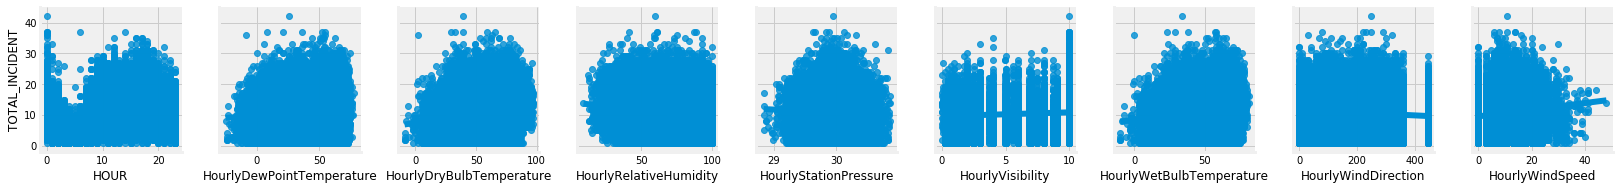

In [357]:
# multiple scatterplots in Seaborn
plt.figure(figsize=(30,15))

sns.pairplot(df7, x_vars=feature_cols, y_vars='TOTAL_INCIDENT', kind='reg');

Text(0.5, 1, 'Auto correlation heat map')

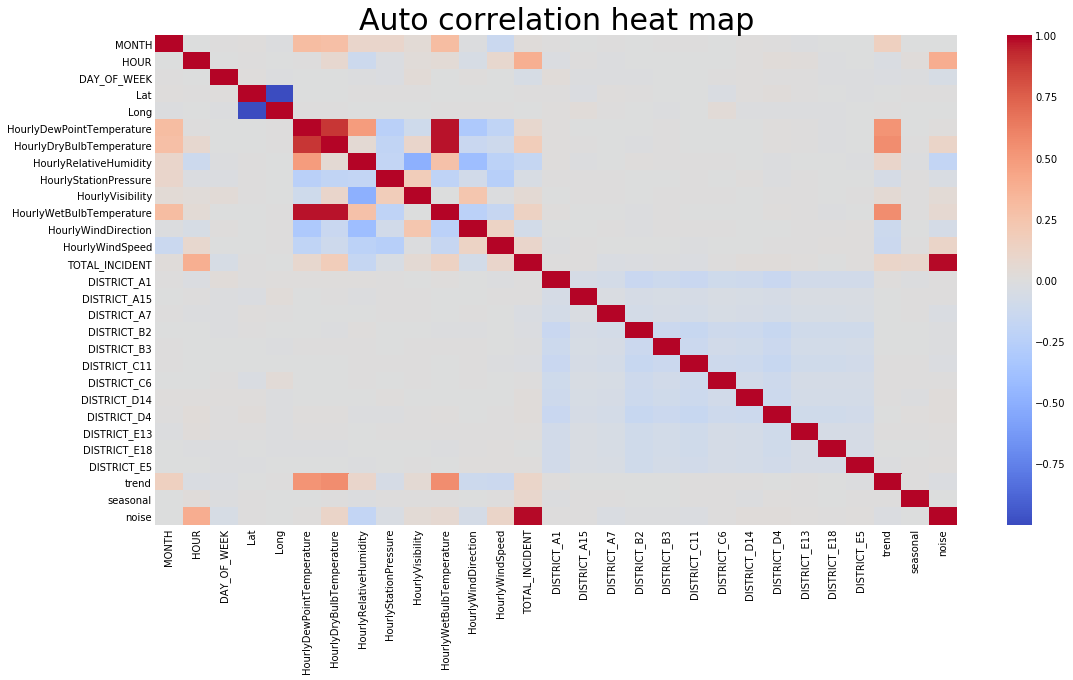

In [241]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(df7.corr(), cmap='coolwarm');
plt.title('Auto correlation heat map', size = (30))


In [244]:
#Importing linear regresion model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [245]:
#LinearRegression?

In [246]:
# Make an instance of a LinearRegression object.
lr = LinearRegression(fit_intercept=False)
type(lr)

sklearn.linear_model._base.LinearRegression

In [247]:
# Calculate metrics
from sklearn import metrics
import numpy as np

In [248]:

# exponential fit
model0 = lr.fit(X, y)
y_pred = model1.predict(X)


print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', model0.score(X,y))

NameError: name 'model1' is not defined

In [251]:

# exponential fit
modelexp = lr.fit(X, np.exp(y))
y_predexp = modelexp.predict(X)


print('MAE:', metrics.mean_absolute_error(y, y_predexp))
print('MSE:', metrics.mean_squared_error(y, y_predexp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_predexp)))
print('R2:', modelexp.score(X,np.exp(y)))

MAE: 129813571580587.72
MSE: 3.2322510644466744e+28
RMSE: 179784622936631.44
R2: 0.0003269964224006383


In [250]:
model1 = lr.fit(X_train, y_train)
y_pred = model1.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', model1.score(X,y))



# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

MAE: 4.22752898735848
MSE: 26.526969056116453
RMSE: 5.150433870667253
R2: 0.2134498994059676
0.0
[ 2.94036765e-01 -8.26193950e-02  2.00698725e-01 -9.60222639e-03
 -8.35976455e-01 -7.70864479e-02 -8.05638851e-02 -6.76677889e-03
  5.26342250e-02  3.13500169e+01  3.11938427e+01  3.06466827e+01
  3.09365436e+01  3.08906287e+01  3.09644062e+01  3.13354172e+01
  3.13313726e+01  3.12037952e+01  3.11728613e+01  3.12860249e+01
  3.14261517e+01]


In [252]:
model2 = lr.fit(X_train, y2_train)
y2_pred = model2.predict(X_test)


# Calculate these metrics by hand!
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R2:', model2.score(X,y))

MAE: 0.5552267367587628
MSE: 0.47563398583067246
RMSE: 0.6896622258980641
R2: 0.011440697194666227


In [253]:
model3 = lr.fit(X_train, y3_train)
y3_pred = model3.predict(X_test)

# Calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(y3_test, y3_pred))
print('MSE:', metrics.mean_squared_error(y3_test, y3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
print('R2:', model3.score(X,y))

MAE: 0.3791360746192854
MSE: 0.20806478473488058
RMSE: 0.456141189474137
R2: 0.010480467452189557


In [254]:
# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

# Compute null RMSE.

print('MAE:', metrics.mean_absolute_error(y_test, y_null))
print('MSE:',np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null)))

MAE: 4.742700195759614
MSE: 5.8070788431456
RMSE: 5.8070788431456


In [255]:
list(zip(feature_cols, lr.coef_))

[('HOUR', -0.006940008109624177),
 ('HourlyDewPointTemperature', 0.007405618028341489),
 ('HourlyDryBulbTemperature', -0.0036559794325678493),
 ('HourlyRelativeHumidity', -0.004904492798568807),
 ('HourlyStationPressure', 0.11388180511762354),
 ('HourlyVisibility', 0.005778567894941816),
 ('HourlyWetBulbTemperature', 0.022702194348583782),
 ('HourlyWindDirection', -7.721813264389144e-05),
 ('HourlyWindSpeed', -0.002872585340611354),
 ('DISTRICT_A1', 6.555994427194252),
 ('DISTRICT_A15', 6.524769568641501),
 ('DISTRICT_A7', 6.549454000199795),
 ('DISTRICT_B2', 6.55933189472264),
 ('DISTRICT_B3', 6.538720314685),
 ('DISTRICT_C11', 6.571783753859144),
 ('DISTRICT_C6', 6.571644388305391),
 ('DISTRICT_D14', 6.567075704716049),
 ('DISTRICT_D4', 6.541120062484612),
 ('DISTRICT_E13', 6.562367838115419),
 ('DISTRICT_E18', 6.551452552229504),
 ('DISTRICT_E5', 6.514547435113827)]

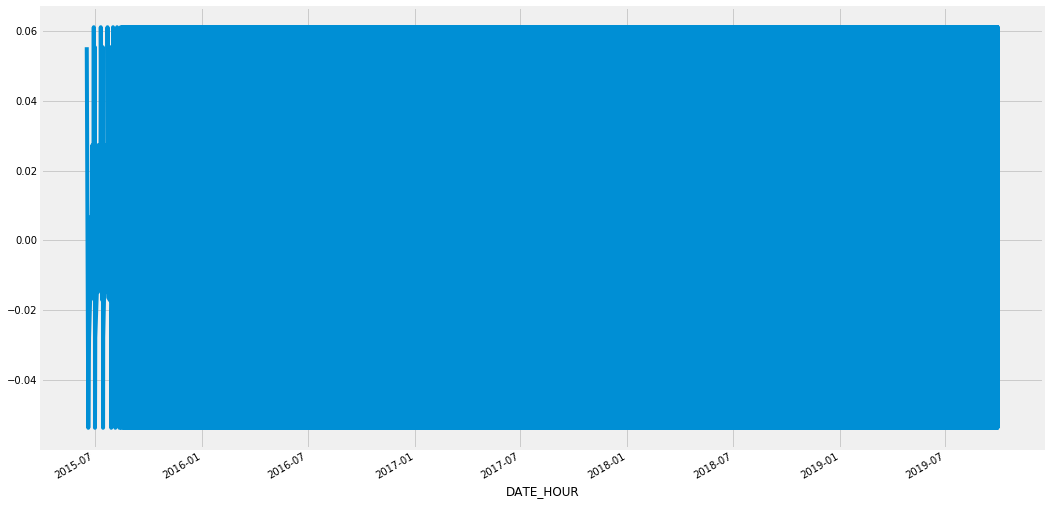

In [143]:
seasonal.plot()

In [439]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=6)
X_ = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)


# Instantiate
lr = LinearRegression()

# Fit
model4 = lr.fit(X_, y_seasonal_train)

# Obtain coefficients
model4.coef_

# Predict
y_seasonal_pred = model4.predict(X_test_trans)

y_seasonal_pred


print('MSE:',np.sqrt(metrics.mean_squared_error(y_seasonal_test, y_seasonal_pred)))


MSE: 3.5572397437283287


NameError: name 'y2' is not defined

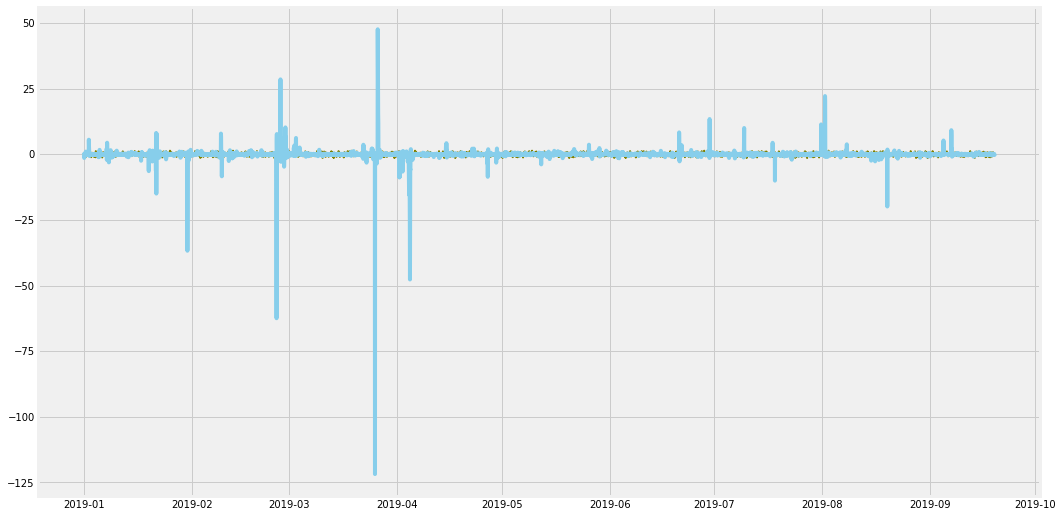

In [91]:
plt.plot(y_seasonal_test,marker='', color='olive', linewidth=2, linestyle='dashed', label="toto");
plt.plot(test.DATE_HOUR,y_seasonal_pred, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4);

In [94]:
print('MSE:',np.sqrt(metrics.mean_squared_error(y_seasonal_test, y3_pred + y_seasonal_pred)))

MSE: 11.057886243622871


In [266]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model=sm.OLS(y,sm.add_constant(X)).fit()
residuals = model.resid

In [267]:

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TOTAL_INCIDENT   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:45:51   Log-Likelihood:            -1.0350e+05
No. Observations:               33657   AIC:                         2.070e+05
Df Residuals:                   33647   BIC:                         2.071e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [527]:
import statsmodels.api as sm

from statsmodels.api import add_constant

X_train = add_constant(X_train)

X_test = add_constant(X_test)


model = sm.OLS(y_train,X_train)

results = model.fit()

y_pred=results.predict(X_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         TOTAL_INCIDENT   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     842.3
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:12:31   Log-Likelihood:                -86672.
No. Observations:               28152   AIC:                         1.734e+05
Df Residuals:                   28142   BIC:                         1.734e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

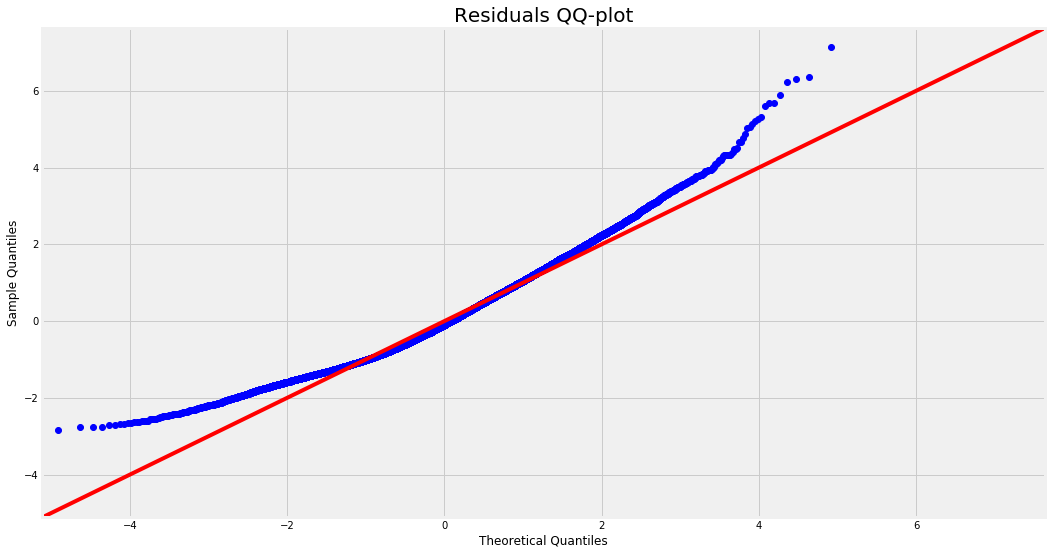

In [272]:
import scipy.stats as stats
    
data_points = np.random.normal(0,1,100)   
fig = sm.qqplot(residuals, stats.t,fit=True, line='45', distargs=(4,))

plt.title('Residuals QQ-plot', size = (20))
plt.show()



#  KNN clustering for Regression

In [420]:

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred_neigh = neigh.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test,y_pred_neigh))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_neigh))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_neigh)))
print('R2:', neigh.score(X_train,y_train))

MAE: 4.673478655767484
MSE: 35.915304268846505
RMSE: 5.992937866259461
R2: 0.7252705526336072


In [421]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred_neigh = neigh.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test,y_pred_neigh))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_neigh))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_neigh)))
print('R2:', neigh.score(X_train,y_train))

MAE: 4.435482894338481
MSE: 31.68392370572207
RMSE: 5.628847458025672
R2: 0.614603926468725


In [504]:
neigh = KNeighborsRegressor(n_neighbors=30)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred_neigh = neigh.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test,y_pred_neigh))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_neigh))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_neigh)))
print('R2:', neigh.score(X_train,y_train))

MAE: 4.114138661822586
MSE: 25.667042486628315
RMSE: 5.066265141761564
R2: 0.32821907767290853


In [423]:
ypn = pd.DataFrame(y_pred_neigh)
knn_df = ypn.set_index(X_test.index)
knn_df['y_test'] = y_test
knn_df

,0,y_test
DATE_HOUR,,
2019-01-01 00:00:00,2.00,33
2019-01-01 01:00:00,9.75,28
2019-01-01 02:00:00,6.75,17
2019-01-01 03:00:00,7.00,15
2019-01-01 05:00:00,3.75,4
...,...,...
2019-09-19 08:00:00,8.50,8
2019-09-19 09:00:00,10.25,19
2019-09-19 10:00:00,8.75,8


In [424]:
knn_df['y_knn_pred-y_test'] = ydf[0] - ydf['y_test']
knn_df

,0,y_test,y_knn_pred-y_test
DATE_HOUR,,,
2019-01-01 00:00:00,2.00,33,-31.333333
2019-01-01 01:00:00,9.75,28,-17.666667
2019-01-01 02:00:00,6.75,17,-10.666667
2019-01-01 03:00:00,7.00,15,-12.333333
2019-01-01 05:00:00,3.75,4,0.000000
...,...,...,...
2019-09-19 08:00:00,8.50,8,3.000000
2019-09-19 09:00:00,10.25,19,-11.666667
2019-09-19 10:00:00,8.75,8,-0.666667


(737119.0, 737150.0)

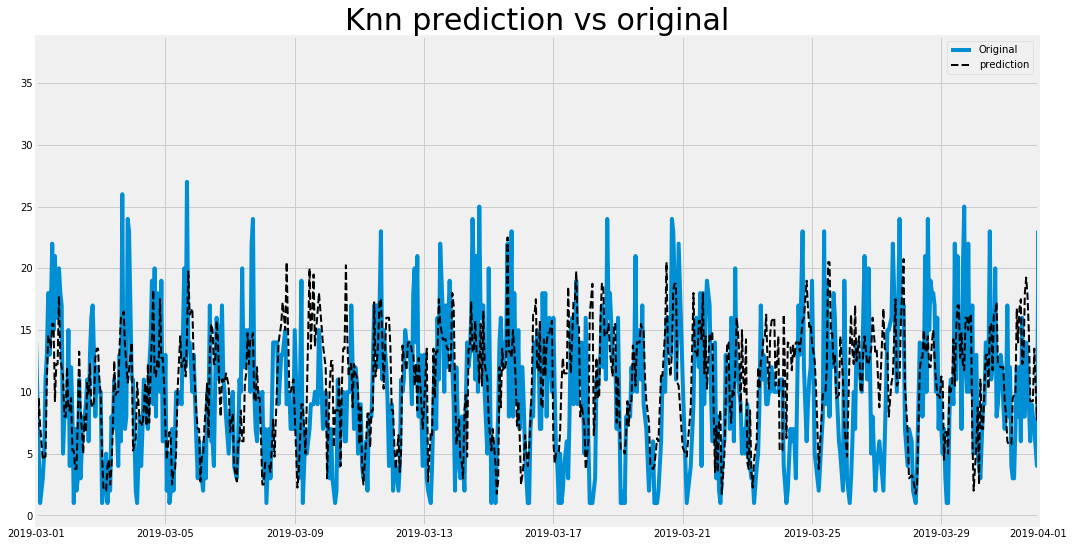

In [494]:
plt.gisize = (30,30)

plt.plot(knn_df['y_test'] , label='Original', marker='', markerfacecolor='blue', linewidth=4)
plt.plot(knn_df[0] ,color='black', label='prediction',marker='', linewidth=2, linestyle='dashed')


plt.legend()
plt.title('Knn prediction vs original', size = 30)

plt.xlim(pd.Timestamp('2019-03'), pd.Timestamp('2019-04'))